# Employee Attrition Project

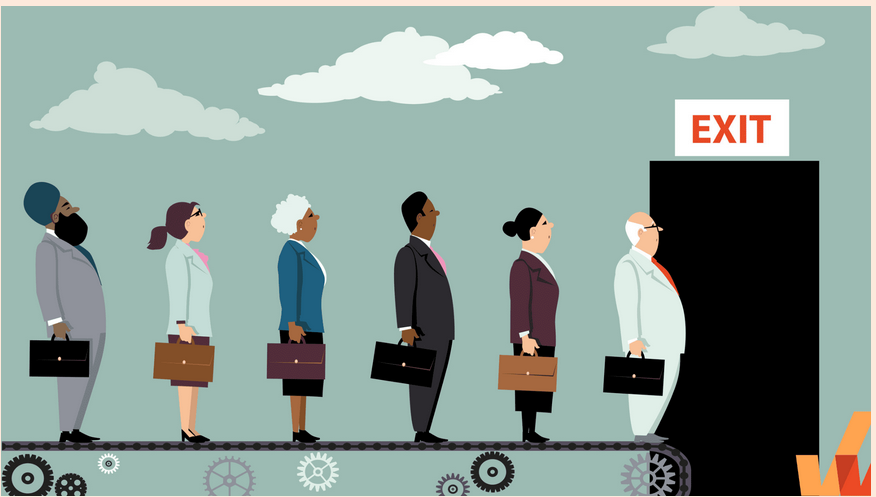

## About this Dataset

##### The Employee Attrition Dataset is collection of employee records and its assosciated information.This data helps to determine employee will attriotion(churn) or not

##### This dataset contains various factors like Variable EmployeeID , Attrition , Age  , TravelProfile ,Department, HomeToWork , EducationField , Gender , HourlnWeek , Involvement , WorklifeBalance , Designation , JobSatisfaction, ESOPS , NumCompaniesWorked , OverTime , SalaryHikelastYear , WorkExperience , LastPromotion, CurrentProfile , MaritalStatus and  MonthlyIncome.Here we will using this dataset for to make analysis on Employee attrition and make prediction on employee will attrition or not.


## Brief Overview About Dataset

In [1]:
import pandas as pd 

## Data Dictionary

In [2]:
data =pd.read_csv('Data_Dictionary.csv' , encoding ='cp1252')

In [3]:
data

,Variable,Description
0,EmployeeID,Unique employee code
1,Attrition,Attrition flag
2,Age,Age of employee
3,TravelProfile,Status of travel in job profile
4,Department,Department of employee
5,HomeToWork,Distance between home to work
6,EducationField,Field of education of an employee
7,Gender,Gender of an employee
8,HourlnWeek,Work hours of an employee in a week
9,Involvement,Involvement of any employee in engagement acti...


## Import Libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from scipy.stats import chi2_contingency
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn import svm
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import accuracy_score , confusion_matrix  , classification_report
from sklearn.metrics import roc_auc_score  , roc_curve
from sklearn.model_selection import cross_val_score

### Import Dataset

##### Train Dataset

In [5]:
train = pd.read_csv('Train_dataset.csv')

In [6]:
train.head()

,EmployeeID,Attrition,Age,TravelProfile,Department,HomeToWork,EducationField,Gender,HourlnWeek,Involvement,...,JobSatisfaction,ESOPs,NumCompaniesWorked,OverTime,SalaryHikelastYear,WorkExperience,LastPromotion,CurrentProfile,MaritalStatus,MonthlyIncome
0,5110001.0,0.0,35.0,Rarely,Analytics,5.0,CA,Male,69.0,1.0,...,1.0,1.0,1.0,1.0,20.0,7.0,2.0,NaN,M,18932.0
1,5110002.0,1.0,32.0,Yes,Sales,5.0,Statistics,Female,62.0,4.0,...,2.0,0.0,8.0,0.0,20.0,4.0,1.0,NaN,Single,18785.0
2,5110003.0,0.0,31.0,Rarely,Analytics,5.0,Statistics,F,45.0,5.0,...,2.0,1.0,3.0,0.0,26.0,12.0,1.0,3.0,Single,22091.0
3,5110004.0,0.0,34.0,Yes,Sales,10.0,Statistics,Female,32.0,3.0,...,4.0,1.0,1.0,0.0,23.0,5.0,1.0,3.0,Divorsed,20302.0
4,5110005.0,0.0,37.0,No,Analytics,27.0,Statistics,Female,49.0,3.0,...,4.0,1.0,8.0,0.0,21.0,12.0,1.0,9.0,Divorsed,21674.0


##### Test Dataset

In [7]:
test = pd.read_csv('Test_dataset.csv')

In [8]:
test.head()

,EmployeeID,Age,TravelProfile,Department,HomeToWork,EducationField,Gender,HourlnWeek,Involvement,WorkLifeBalance,...,JobSatisfaction,ESOPs,NumCompaniesWorked,OverTime,SalaryHikelastYear,WorkExperience,LastPromotion,CurrentProfile,MaritalStatus,MonthlyIncome
0,6110001,18.0,No,NaN,9.0,CA,Male,80.0,3,2,...,3,1,1,0,17.0,0.0,0.0,0.0,Single,16904.0
1,6110002,20.0,Rarely,Analytics,28.0,Statistics,Female,59.0,1,3,...,1,1,2,1,18.0,2.0,1.0,NaN,Single,18994.0
2,6110003,50.0,Rarely,Analytics,19.0,CA,Female,76.0,3,3,...,5,0,5,1,22.0,18.0,3.0,3.0,M,18587.0
3,6110004,32.0,Rarely,Sales,23.0,Statistics,Female,73.0,5,2,...,3,0,4,1,17.0,5.0,3.0,3.0,Married,20559.0
4,6110005,39.0,Rarely,Analytics,7.0,CA,Male,42.0,4,1,...,5,1,4,0,20.0,9.0,1.0,7.0,Married,24991.0


## Exploratory Data Analysis

###### Shape

In [9]:
print(train.shape)

(7810, 22)


##### Insights : Train dataset contains 7810 records and 22 columns 

In [10]:
print(test.shape)

(2630, 21)


###### Insights : Test dataset contains 2630 records and 21 columns 

##### Size

In [11]:
print(train.size)

171820


In [12]:
print(test.size)

55230


#### Info

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7810 entries, 0 to 7809
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   EmployeeID          5180 non-null   float64
 1   Attrition           5180 non-null   float64
 2   Age                 4864 non-null   float64
 3   TravelProfile       5180 non-null   object 
 4   Department          5056 non-null   object 
 5   HomeToWork          4925 non-null   float64
 6   EducationField      5180 non-null   object 
 7   Gender              5134 non-null   object 
 8   HourlnWeek          4893 non-null   float64
 9   Involvement         5180 non-null   float64
 10  WorkLifeBalance     5180 non-null   float64
 11  Designation         5142 non-null   object 
 12  JobSatisfaction     5180 non-null   float64
 13  ESOPs               5180 non-null   float64
 14  NumCompaniesWorked  5180 non-null   float64
 15  OverTime            5180 non-null   float64
 16  Salary

##### Insights : Train dataset contains 7810 records and 22 columns and it has some features contain missing values and one thing notice here after 5180 to  7810 . That data its complete missing so we drpping that data.It not make sense here

In [14]:
indices_to_drop = range(5180 , 7810)

In [15]:
train.drop(index = indices_to_drop,axis = 0 , inplace = True)

In [16]:
train.shape

(5180, 22)

In [17]:
train.head(2)

,EmployeeID,Attrition,Age,TravelProfile,Department,HomeToWork,EducationField,Gender,HourlnWeek,Involvement,...,JobSatisfaction,ESOPs,NumCompaniesWorked,OverTime,SalaryHikelastYear,WorkExperience,LastPromotion,CurrentProfile,MaritalStatus,MonthlyIncome
0,5110001.0,0.0,35.0,Rarely,Analytics,5.0,CA,Male,69.0,1.0,...,1.0,1.0,1.0,1.0,20.0,7.0,2.0,NaN,M,18932.0
1,5110002.0,1.0,32.0,Yes,Sales,5.0,Statistics,Female,62.0,4.0,...,2.0,0.0,8.0,0.0,20.0,4.0,1.0,NaN,Single,18785.0


In [18]:
train.tail(2)

,EmployeeID,Attrition,Age,TravelProfile,Department,HomeToWork,EducationField,Gender,HourlnWeek,Involvement,...,JobSatisfaction,ESOPs,NumCompaniesWorked,OverTime,SalaryHikelastYear,WorkExperience,LastPromotion,CurrentProfile,MaritalStatus,MonthlyIncome
5178,5115179.0,0.0,26.0,Rarely,Marketing,26.0,Statistics,Female,61.0,3.0,...,3.0,0.0,1.0,0.0,28.0,8.0,5.0,7.0,Divorsed,17942.0
5179,5115180.0,1.0,NaN,Yes,Sales,13.0,Statistics,Male,74.0,4.0,...,5.0,1.0,1.0,0.0,23.0,1.0,0.0,0.0,Divorsed,17033.0


In [19]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5180 entries, 0 to 5179
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   EmployeeID          5180 non-null   float64
 1   Attrition           5180 non-null   float64
 2   Age                 4864 non-null   float64
 3   TravelProfile       5180 non-null   object 
 4   Department          5056 non-null   object 
 5   HomeToWork          4925 non-null   float64
 6   EducationField      5180 non-null   object 
 7   Gender              5134 non-null   object 
 8   HourlnWeek          4893 non-null   float64
 9   Involvement         5180 non-null   float64
 10  WorkLifeBalance     5180 non-null   float64
 11  Designation         5142 non-null   object 
 12  JobSatisfaction     5180 non-null   float64
 13  ESOPs               5180 non-null   float64
 14  NumCompaniesWorked  5180 non-null   float64
 15  OverTime            5180 non-null   float64
 16  Salary

##### Our target column is also in float so we can typecast as int

In [20]:
train['Attrition'].dtypes

dtype('float64')

In [21]:
train['Attrition'] = train['Attrition'].astype('int64')

In [22]:
train['Attrition'].dtypes

dtype('int64')

##### Insights : Now we have proper shape of train dataset where 5180 records and 23 columns 

In [23]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2630 entries, 0 to 2629
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   EmployeeID          2630 non-null   int64  
 1   Age                 2488 non-null   float64
 2   TravelProfile       2630 non-null   object 
 3   Department          2572 non-null   object 
 4   HomeToWork          2504 non-null   float64
 5   EducationField      2630 non-null   object 
 6   Gender              2600 non-null   object 
 7   HourlnWeek          2494 non-null   float64
 8   Involvement         2630 non-null   int64  
 9   WorkLifeBalance     2630 non-null   int64  
 10  Designation         2600 non-null   object 
 11  JobSatisfaction     2630 non-null   int64  
 12  ESOPs               2630 non-null   int64  
 13  NumCompaniesWorked  2630 non-null   int64  
 14  OverTime            2630 non-null   int64  
 15  SalaryHikelastYear  2536 non-null   float64
 16  WorkEx

###### Insights :Test dataset contains 2630 records and 21 columns. It has some features contain missing values

##### Create Data Feature in both train and test dataset for understanding which one is train and test data beacuse we will merge the train and test data for to aviod repeat Feature Transformation (Data Preprocessing)

In [24]:
train['Data'] = 'Train'
test['Data'] = 'Test'

In [25]:
train.head(2)

,EmployeeID,Attrition,Age,TravelProfile,Department,HomeToWork,EducationField,Gender,HourlnWeek,Involvement,...,ESOPs,NumCompaniesWorked,OverTime,SalaryHikelastYear,WorkExperience,LastPromotion,CurrentProfile,MaritalStatus,MonthlyIncome,Data
0,5110001.0,0,35.0,Rarely,Analytics,5.0,CA,Male,69.0,1.0,...,1.0,1.0,1.0,20.0,7.0,2.0,NaN,M,18932.0,Train
1,5110002.0,1,32.0,Yes,Sales,5.0,Statistics,Female,62.0,4.0,...,0.0,8.0,0.0,20.0,4.0,1.0,NaN,Single,18785.0,Train


In [26]:
test.head(2)

,EmployeeID,Age,TravelProfile,Department,HomeToWork,EducationField,Gender,HourlnWeek,Involvement,WorkLifeBalance,...,ESOPs,NumCompaniesWorked,OverTime,SalaryHikelastYear,WorkExperience,LastPromotion,CurrentProfile,MaritalStatus,MonthlyIncome,Data
0,6110001,18.0,No,NaN,9.0,CA,Male,80.0,3,2,...,1,1,0,17.0,0.0,0.0,0.0,Single,16904.0,Test
1,6110002,20.0,Rarely,Analytics,28.0,Statistics,Female,59.0,1,3,...,1,2,1,18.0,2.0,1.0,NaN,Single,18994.0,Test


#### We merge the train and test data and create one single Dataset where we will Data Preprocessing

In [27]:
df = pd.concat([train , test] , axis = 0)

In [28]:
#pd.concat([train , test] , axis = 0)

In [29]:
df.head(2)

,EmployeeID,Attrition,Age,TravelProfile,Department,HomeToWork,EducationField,Gender,HourlnWeek,Involvement,...,ESOPs,NumCompaniesWorked,OverTime,SalaryHikelastYear,WorkExperience,LastPromotion,CurrentProfile,MaritalStatus,MonthlyIncome,Data
0,5110001.0,0.0,35.0,Rarely,Analytics,5.0,CA,Male,69.0,1.0,...,1.0,1.0,1.0,20.0,7.0,2.0,NaN,M,18932.0,Train
1,5110002.0,1.0,32.0,Yes,Sales,5.0,Statistics,Female,62.0,4.0,...,0.0,8.0,0.0,20.0,4.0,1.0,NaN,Single,18785.0,Train


In [30]:
df.tail(2)

,EmployeeID,Attrition,Age,TravelProfile,Department,HomeToWork,EducationField,Gender,HourlnWeek,Involvement,...,ESOPs,NumCompaniesWorked,OverTime,SalaryHikelastYear,WorkExperience,LastPromotion,CurrentProfile,MaritalStatus,MonthlyIncome,Data
2628,6112629.0,NaN,NaN,Rarely,Analytics,11.0,Statistics,Female,NaN,4.0,...,0.0,2.0,0.0,18.0,2.0,1.0,1.0,Single,17261.0,Test
2629,6112630.0,NaN,50.0,Yes,Analytics,1.0,Statistics,F,73.0,3.0,...,1.0,3.0,1.0,24.0,28.0,0.0,7.0,Married,33172.0,Test


In [31]:
df.shape

(7810, 23)

### Univariate Analysis

#### Attrition Rate of Employees in Dataset

In [32]:
len(df[df['Attrition'] == 1]) / len(df) * 100

18.50192061459667

##### Insights : 18.50 %  employee leaves the organisation

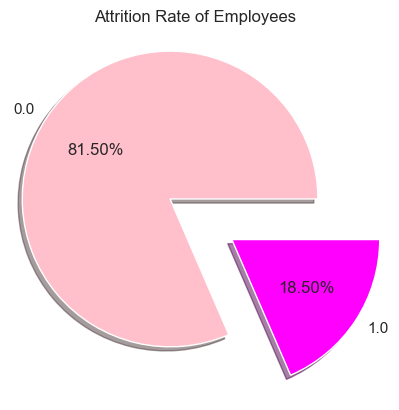

In [33]:
plt.pie(x = [81.5 ,18.50] ,
    explode=[0.2 , 0.3],
    labels=df['Attrition'].value_counts().index,
    colors=['pink' , 'magenta'],
    autopct= '%1.2f%%',
    pctdistance=0.6,
    shadow=True)
plt.title('Attrition Rate of Employees')
plt.show()

#### Gender

In [34]:
df['Gender'].value_counts()

Male      4668
Female    2020
F         1046
Name: Gender, dtype: int64

##### We need to sort F as Female

In [35]:
df['Gender'].replace({'F': "Female"} , inplace = True)

In [36]:
df['Gender'].value_counts()

Male      4668
Female    3066
Name: Gender, dtype: int64

##### MaritalStatus

In [37]:
df['MaritalStatus'].value_counts()

Single      2709
Married     2455
Divorsed    1493
M           1153
Name: MaritalStatus, dtype: int64

#### Insights : We have two categories of married and M . so we need to sort as one like Married

In [38]:
df['MaritalStatus'].replace({'M' : 'Married'} , inplace = True)

In [39]:
df['MaritalStatus'].value_counts()

Married     3608
Single      2709
Divorsed    1493
Name: MaritalStatus, dtype: int64

###### 1.Check Missing Values

In [40]:
df.isnull().sum()

EmployeeID               0
Attrition             2630
Age                    458
TravelProfile            0
Department             182
HomeToWork             381
EducationField           0
Gender                  76
HourlnWeek             423
Involvement              0
WorkLifeBalance          0
Designation             68
JobSatisfaction          0
ESOPs                    0
NumCompaniesWorked       0
OverTime                 0
SalaryHikelastYear     263
WorkExperience         309
LastPromotion          127
CurrentProfile         445
MaritalStatus            0
MonthlyIncome          126
Data                     0
dtype: int64

In [41]:
df.isnull().sum() / len(df) * 100

EmployeeID             0.000000
Attrition             33.674776
Age                    5.864277
TravelProfile          0.000000
Department             2.330346
HomeToWork             4.878361
EducationField         0.000000
Gender                 0.973111
HourlnWeek             5.416133
Involvement            0.000000
WorkLifeBalance        0.000000
Designation            0.870679
JobSatisfaction        0.000000
ESOPs                  0.000000
NumCompaniesWorked     0.000000
OverTime               0.000000
SalaryHikelastYear     3.367478
WorkExperience         3.956466
LastPromotion          1.626120
CurrentProfile         5.697823
MaritalStatus          0.000000
MonthlyIncome          1.613316
Data                   0.000000
dtype: float64

##### Insights : we have multiple features have missing values . so will impute it

###### 2.split the data into characters and numerical columns

In [42]:
numeric_col = []
character_col = []

for col in df.columns[:-1]:

    
    if df[col].dtypes == 'int64' or df[col].dtypes == 'float64':
        
        
        numeric_col.append(col)
        
        
    else:
        
        character_col.append(col)

In [43]:
print(numeric_col)

['EmployeeID', 'Attrition', 'Age', 'HomeToWork', 'HourlnWeek', 'Involvement', 'WorkLifeBalance', 'JobSatisfaction', 'ESOPs', 'NumCompaniesWorked', 'OverTime', 'SalaryHikelastYear', 'WorkExperience', 'LastPromotion', 'CurrentProfile', 'MonthlyIncome']


In [44]:
print(character_col)

['TravelProfile', 'Department', 'EducationField', 'Gender', 'Designation', 'MaritalStatus']


In [45]:
df[numeric_col].head(2)

,EmployeeID,Attrition,Age,HomeToWork,HourlnWeek,Involvement,WorkLifeBalance,JobSatisfaction,ESOPs,NumCompaniesWorked,OverTime,SalaryHikelastYear,WorkExperience,LastPromotion,CurrentProfile,MonthlyIncome
0,5110001.0,0.0,35.0,5.0,69.0,1.0,1.0,1.0,1.0,1.0,1.0,20.0,7.0,2.0,NaN,18932.0
1,5110002.0,1.0,32.0,5.0,62.0,4.0,3.0,2.0,0.0,8.0,0.0,20.0,4.0,1.0,NaN,18785.0


In [46]:
df[character_col].head(2)

,TravelProfile,Department,EducationField,Gender,Designation,MaritalStatus
0,Rarely,Analytics,CA,Male,Executive,Married
1,Yes,Sales,Statistics,Female,Executive,Single


##### 3.Detect the Outliers

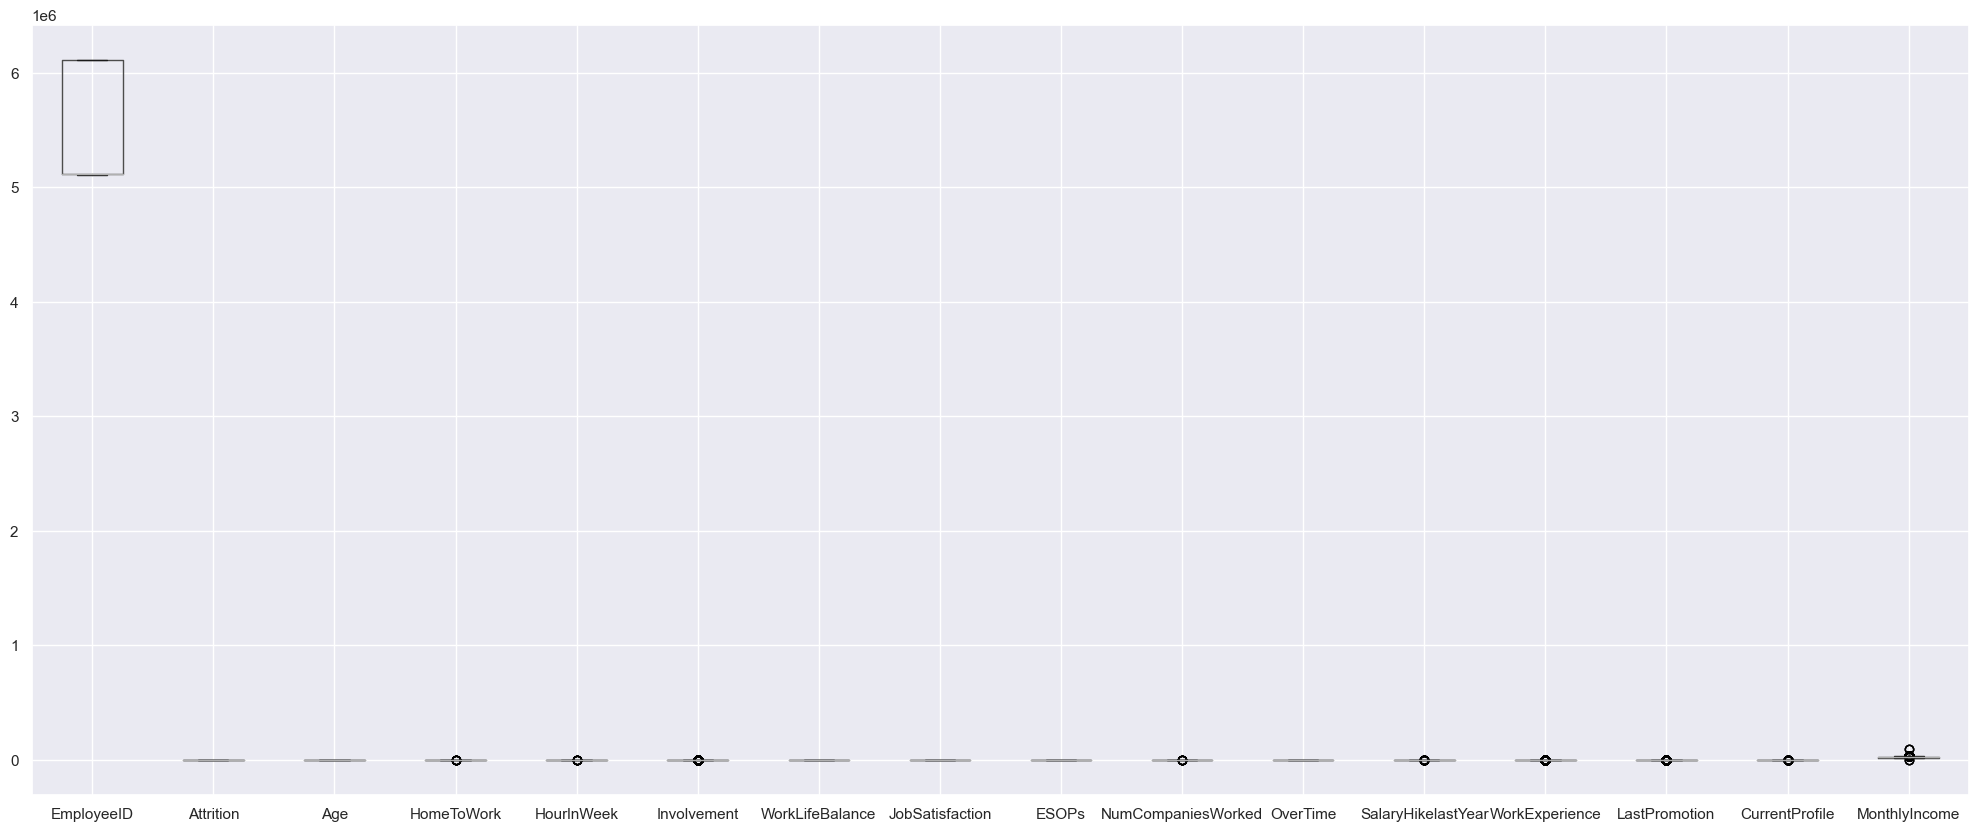

In [47]:
plt.figure(figsize = (25 ,10))
df.boxplot()
plt.show()

In [48]:
def Detect_Outliers(df , n):
    
    for col in df.columns:
        
        if df[col].dtypes =='int64' or df[col].dtypes =='float64':
            
            Q1 = df[col].quantile(0.25)
            
            Q2 = df[col].quantile(0.50)
            
            Q3 = df[col].quantile(0.75)
            
            IQR = Q3 - Q1
            
            low_lim = Q1 - ( n * IQR)
            
            high_lim = Q3 + (n * IQR)
            
            outliers = (df[(df[col] > high_lim) | (df[col] < low_lim)].shape[0])
            
            print(f'{col}   : {outliers}')

In [49]:
Detect_Outliers(df , 1.5)

EmployeeID   : 0
Attrition   : 0
Age   : 0
HomeToWork   : 9
HourlnWeek   : 9
Involvement   : 544
WorkLifeBalance   : 0
JobSatisfaction   : 0
ESOPs   : 0
NumCompaniesWorked   : 9
OverTime   : 0
SalaryHikelastYear   : 38
WorkExperience   : 341
LastPromotion   : 1025
CurrentProfile   : 74
MonthlyIncome   : 599


<Axes: xlabel='WorkExperience'>

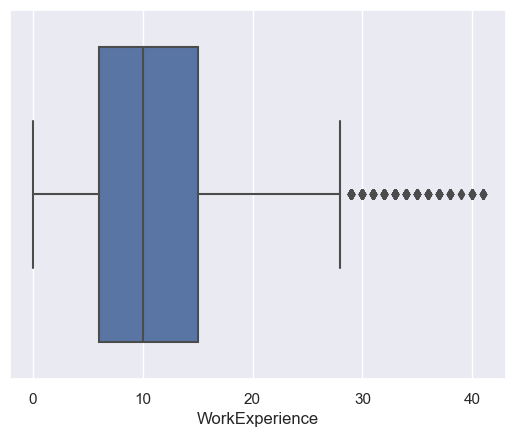

In [50]:
sns.boxplot(x = df['WorkExperience'])

##### 4.Check ambiguity value or unique values

In [51]:
for col in df.columns:
    
    print('**'*15 , col , '**'*15)
    print()
    
    print(df[col].nunique())

****************************** EmployeeID ******************************

7810
****************************** Attrition ******************************

2
****************************** Age ******************************

44
****************************** TravelProfile ******************************

3
****************************** Department ******************************

3
****************************** HomeToWork ******************************

36
****************************** EducationField ******************************

6
****************************** Gender ******************************

2
****************************** HourlnWeek ******************************

63
****************************** Involvement ******************************

5
****************************** WorkLifeBalance ******************************

5
****************************** Designation ******************************

5
****************************** JobSatisfaction ******************************

5

##### Insights : By visualising this value , we get understand each and every  column contains most of data are classification only or repeated only

#### 1.Age

In [52]:
df.head(2)

,EmployeeID,Attrition,Age,TravelProfile,Department,HomeToWork,EducationField,Gender,HourlnWeek,Involvement,...,ESOPs,NumCompaniesWorked,OverTime,SalaryHikelastYear,WorkExperience,LastPromotion,CurrentProfile,MaritalStatus,MonthlyIncome,Data
0,5110001.0,0.0,35.0,Rarely,Analytics,5.0,CA,Male,69.0,1.0,...,1.0,1.0,1.0,20.0,7.0,2.0,NaN,Married,18932.0,Train
1,5110002.0,1.0,32.0,Yes,Sales,5.0,Statistics,Female,62.0,4.0,...,0.0,8.0,0.0,20.0,4.0,1.0,NaN,Single,18785.0,Train


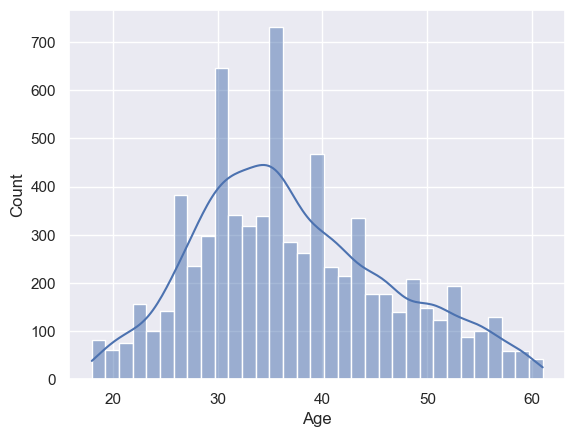

In [53]:
sns.histplot(df['Age']  , kde = True )
plt.show()
#sns.histplot(data = df , x = 'Age' , y = 'Attrition')

##### Insights : From Histogram , we get to know ,
##### 1. Age range 30 - 40 has higher attrition rate. Any one perticular age have maxm more than 200 employee get attried 
##### 2. Age range 50 - 60 has less attrition rate.
##### 3. Age range 40 - 50 has less attrtion rate
##### 4. Age range 30 - 40 has when age get increase it increase attrition rate

##### 2.TravelProfile

In [54]:
df.groupby(df['TravelProfile']).Attrition.mean()

TravelProfile
No        0.154472
Rarely    0.263954
Yes       0.389153
Name: Attrition, dtype: float64

In [55]:
value = df.groupby(df['TravelProfile']).Attrition.mean().values

In [56]:
value

array([0.15447154, 0.26395381, 0.38915319])

In [57]:
label = df.groupby(df['TravelProfile']).Attrition.mean().index

In [58]:
label

Index(['No', 'Rarely', 'Yes'], dtype='object', name='TravelProfile')

#### Pietplot

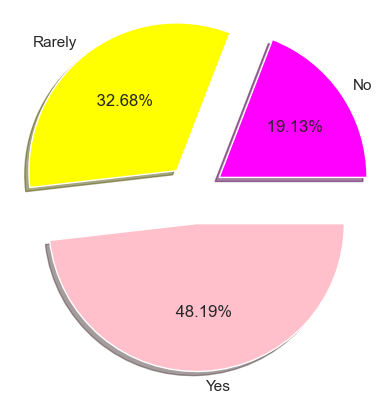

In [59]:
plt.pie(x = value,
    explode=(0.2 , 0.2 , 0.2),
    labels= label,
    colors=['magenta' ,'yellow' ,'pink'] ,
    #autopct='%0.2f%%',
    autopct='% 1.2f%%',
    pctdistance=0.6,
    shadow=True)
plt.show()

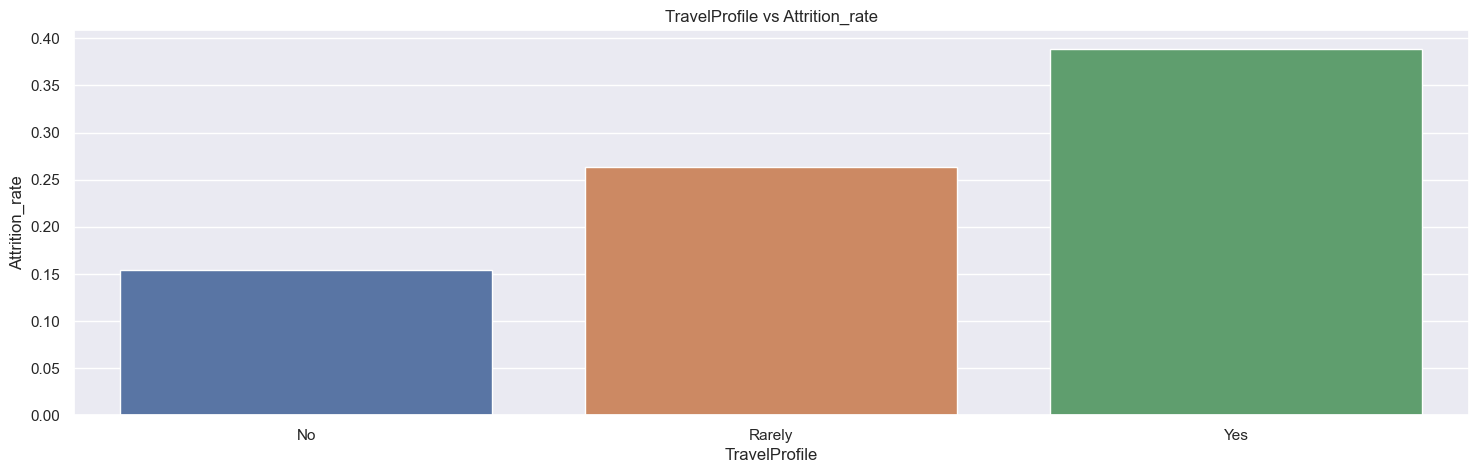

In [60]:
plt.figure(figsize = (18 , 5))
a = sns.barplot( x = label , y = value)
plt.xlabel('TravelProfile')
plt.ylabel('Attrition_rate')
plt.title('TravelProfile vs Attrition_rate')
plt.show()

###### Insights : From here we get to know most of attrtioned employees are daily  and rearly traveller from one place to another.this is also important factor for attrition.

#### Department

In [61]:
df.groupby(df['Department']).Attrition.mean()

Department
Analytics    0.238894
Marketing    0.301802
Sales        0.331269
Name: Attrition, dtype: float64

#### Bar plot

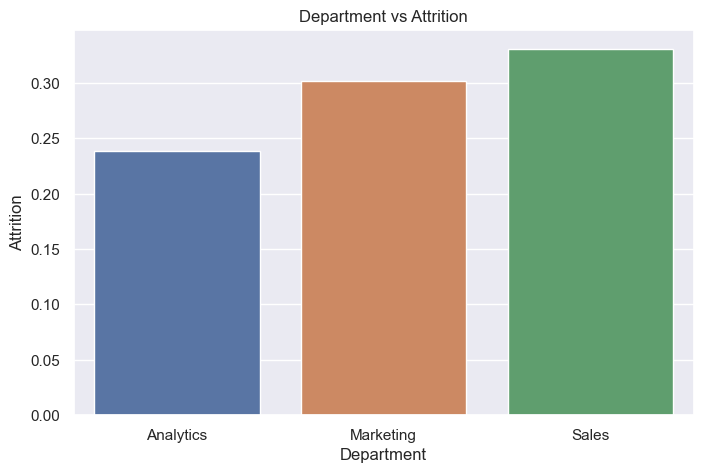

In [62]:
plt.figure(figsize = (8 , 5))
sns.barplot(x = df.groupby(df['Department']).Attrition.mean().index , y = df.groupby(df['Department']).Attrition.mean().values)
plt.xlabel('Department')
plt.ylabel('Attrition')
plt.title('Department vs Attrition')
plt.show()

##### Insights : Most of job leaving employees are from sales and marketing team

###### HomeToWork

In [63]:
df.groupby(df['HomeToWork']).Attrition.mean()

HomeToWork
1.0      0.209375
2.0      0.196970
3.0      0.224283
4.0      0.226667
5.0      0.250000
6.0      0.289062
7.0      0.271845
8.0      0.204167
9.0      0.200000
10.0     0.338462
11.0     0.211111
12.0     0.315508
13.0     0.232432
14.0     0.375000
15.0     0.364865
16.0     0.348315
17.0     0.380000
18.0     0.325000
19.0     0.302083
20.0     0.288136
21.0     0.223529
22.0     0.311475
23.0     0.389610
24.0     0.367089
25.0     0.558140
26.0     0.295775
27.0     0.393939
28.0     0.417910
29.0     0.207792
30.0     0.375000
31.0     0.156250
32.0     0.307692
34.0     0.000000
36.0     0.000000
121.0    0.000000
123.0         NaN
Name: Attrition, dtype: float64

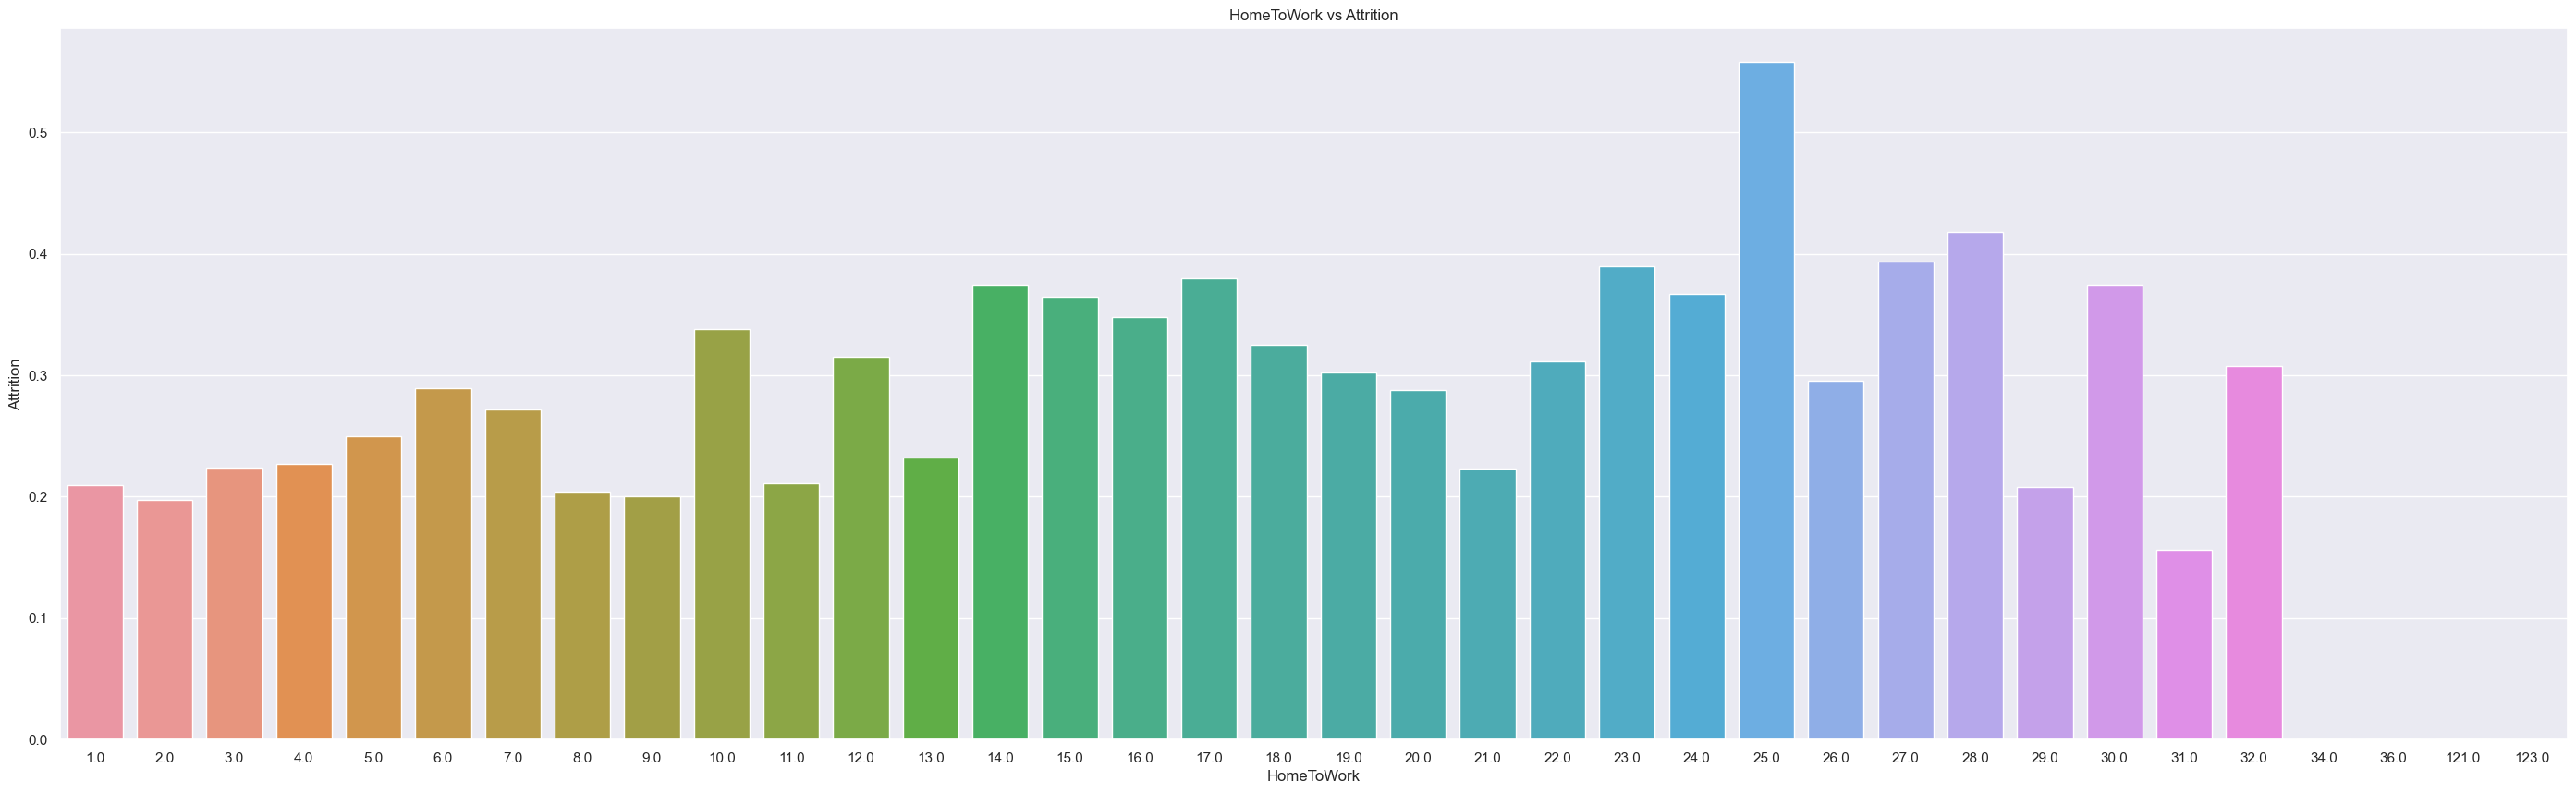

In [64]:
plt.figure(figsize = (35 , 10))
sns.barplot(x = df.groupby(df['HomeToWork']).Attrition.mean().index , y = df.groupby(df['HomeToWork']).Attrition.mean().values)
plt.xlabel('HomeToWork')
plt.ylabel('Attrition')
plt.title('HomeToWork vs Attrition')
plt.show()

##### Insights : We get noticed , when distance get increase means travelling home to work , so attrition rate of employee also get increase

#### EducationField

In [65]:
df.groupby(df['EducationField']).Attrition.mean()

EducationField
CA                   0.242949
Engineer             0.404517
MBA                  0.384615
Marketing Diploma    0.366501
Other                0.225352
Statistics           0.253171
Name: Attrition, dtype: float64

In [66]:
df.groupby(df['EducationField']).Attrition.mean()

EducationField
CA                   0.242949
Engineer             0.404517
MBA                  0.384615
Marketing Diploma    0.366501
Other                0.225352
Statistics           0.253171
Name: Attrition, dtype: float64

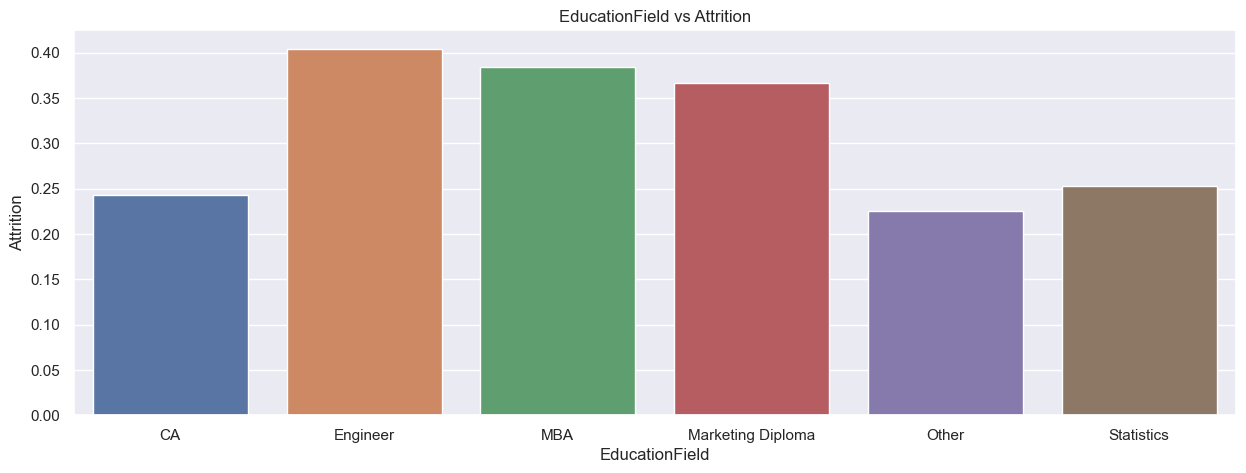

In [67]:
plt.figure(figsize = (15 , 5))
sns.barplot(x = df.groupby(df['EducationField']).Attrition.mean().index , y = df.groupby(df['EducationField']).Attrition.mean().values)
plt.xlabel('EducationField')
plt.ylabel('Attrition')
plt.title('EducationField vs Attrition')
plt.show()

###### Insights : By educationfield  , we get understand Enginner , MBA , Marketing Diploma employess are mostly / higher attritioned / leave the job or  Enginner , MBA , Marketing Diploma have higher attrition rate as compare to others

##### Gender

In [68]:
df.groupby(df['Gender']).Attrition.mean()

Gender
Female    0.251961
Male      0.292178
Name: Attrition, dtype: float64

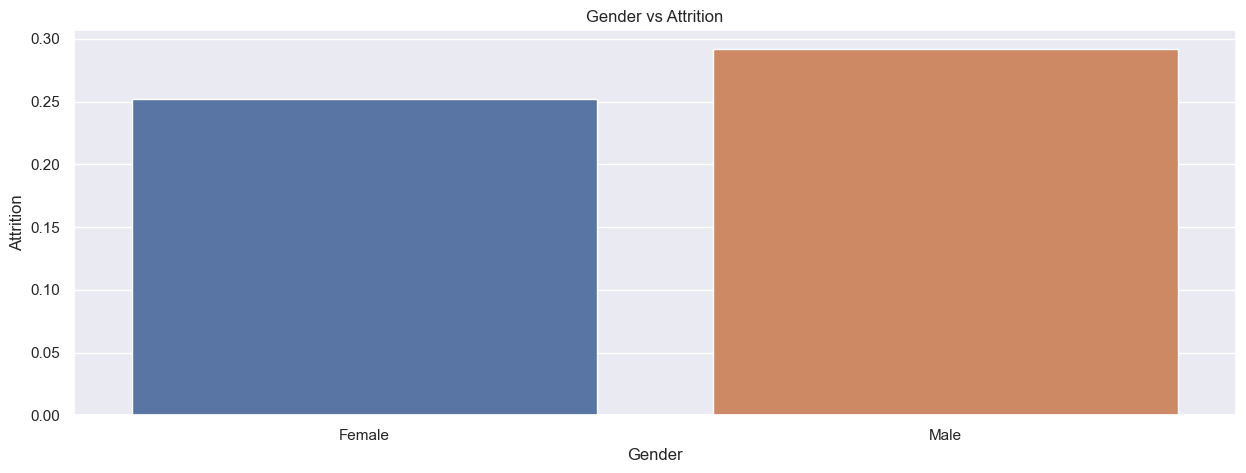

In [69]:
plt.figure(figsize = (15 , 5))
sns.barplot(x = df.groupby(df['Gender']).Attrition.mean().index ,  y = df.groupby(df['Gender']).Attrition.mean().values)
plt.xlabel('Gender')
plt.ylabel('Attrition')
plt.title('Gender vs Attrition' )
plt.show()

##### Insights : From this we can say attrition rate of male is greater than female

#### HourInWeek

In [70]:
pd.DataFrame(df.groupby(df['HourlnWeek']).Attrition.mean())

,Attrition
HourlnWeek,
10.0,0.0
12.0,0.0
14.0,NaN
23.0,NaN
25.0,NaN
...,...
87.0,0.0
89.0,0.0
99.0,0.0


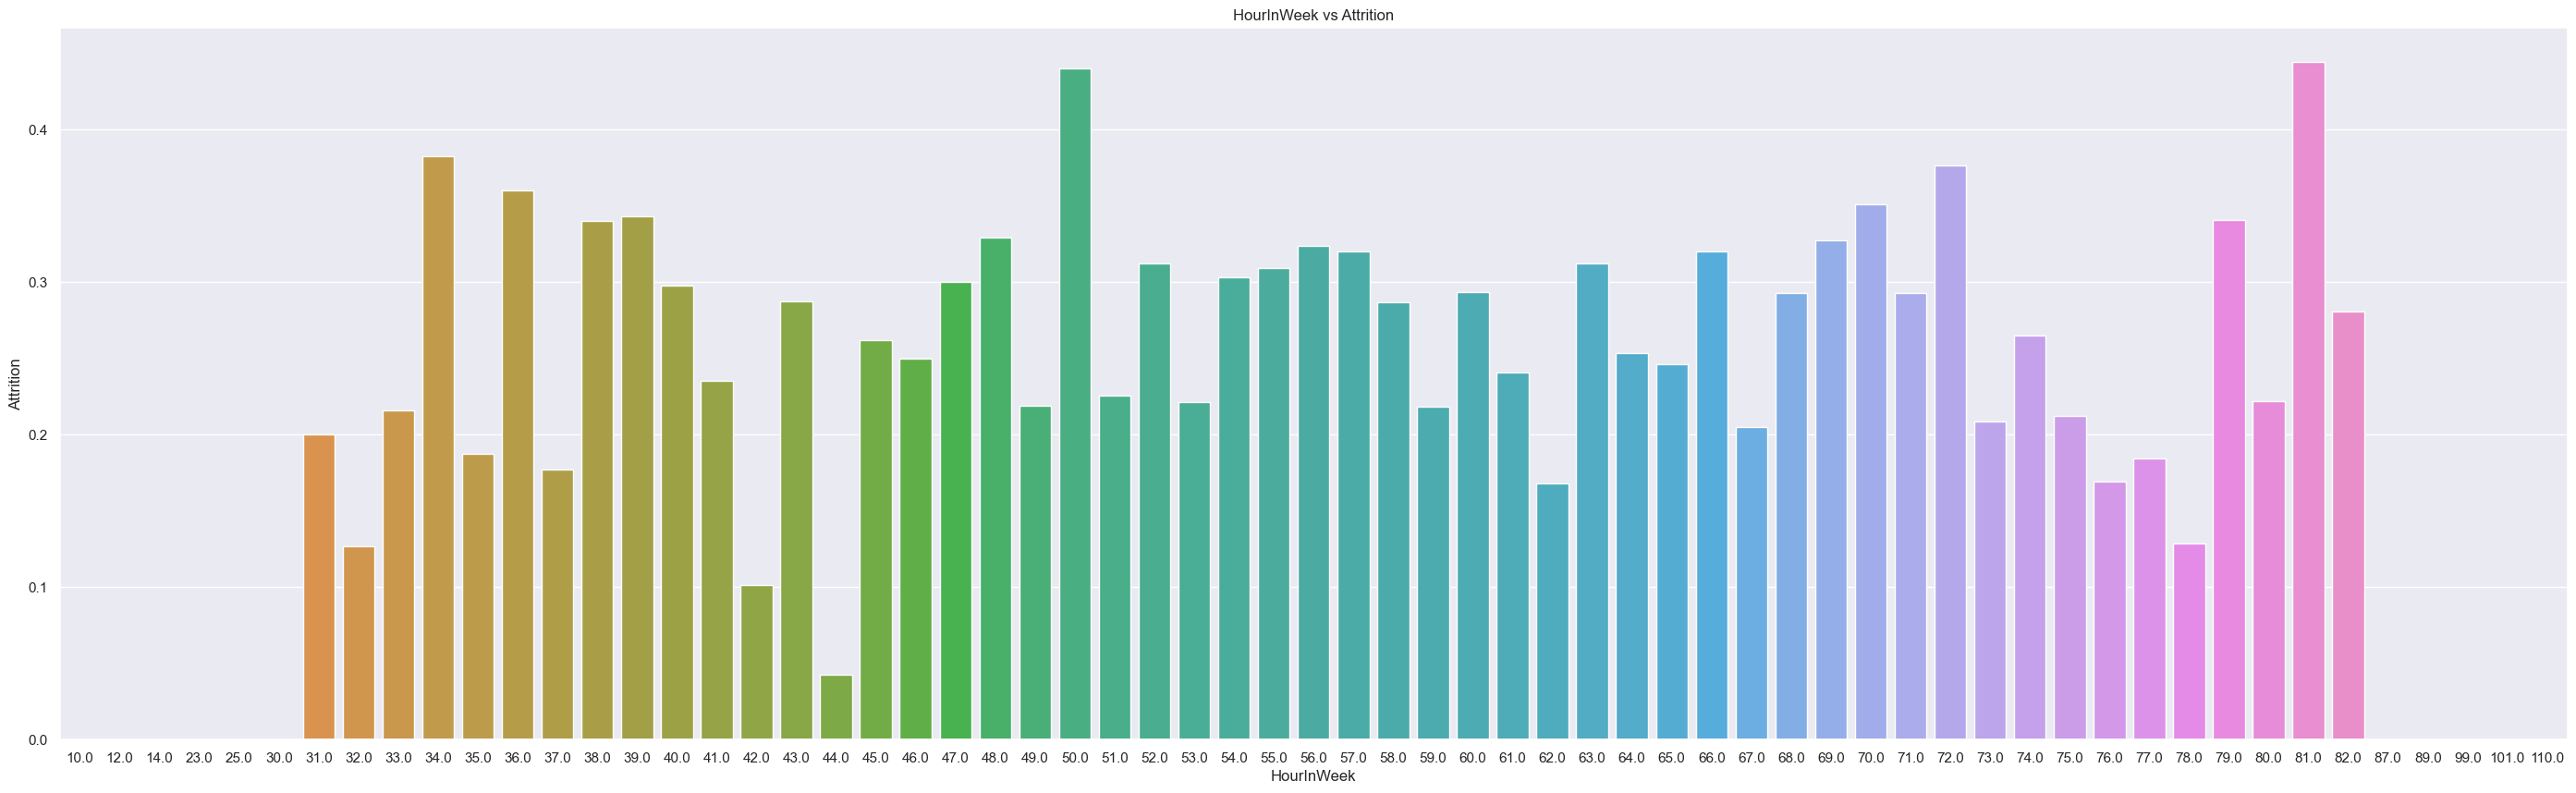

In [71]:
plt.figure(figsize = (35 , 10))
sns.barplot(x = df.groupby(df['HourlnWeek']).Attrition.mean().index , y = df.groupby(df['HourlnWeek']).Attrition.mean().values)
plt.xlabel('HourInWeek')
plt.ylabel('Attrition')
plt.title('HourInWeek vs Attrition')
plt.show()

##### Involvement

In [72]:
pd.DataFrame(df.groupby(df['Involvement']).Attrition.mean())

,Attrition
Involvement,
1.0,0.188366
2.0,0.128440
3.0,0.248515
4.0,0.332103
5.0,0.492308


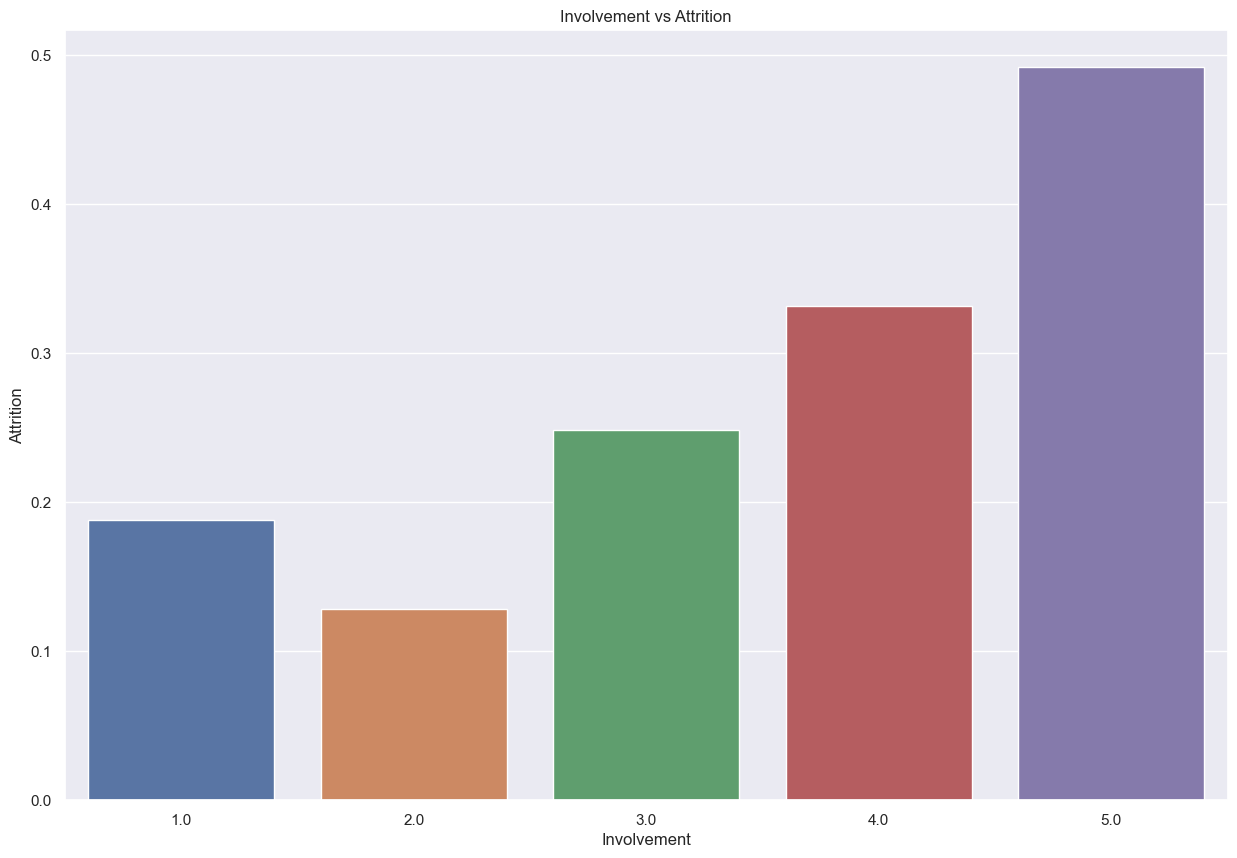

In [73]:
plt.figure(figsize = (15 , 10))
sns.barplot(x = df.groupby(df['Involvement']).Attrition.mean().index , y = df.groupby(df['Involvement']).Attrition.mean().values)
plt.xlabel('Involvement')
plt.ylabel('Attrition')
plt.title('Involvement vs Attrition')
plt.show()

##### Insights : From Involvement , we noticed , more active people has more attrition rate. Less active people has less attrition rate . because 5 is the highest Involvement rate  and 1 is lowest attrition rate. might be there is some issues of employee  with HR activity also.

##### WorkLifeBalance

In [74]:
pd.DataFrame(df.groupby(df['WorkLifeBalance']).Attrition.mean())

,Attrition
WorkLifeBalance,
1.0,0.262902
2.0,0.276342
3.0,0.283681
4.0,0.297170
5.0,0.273959


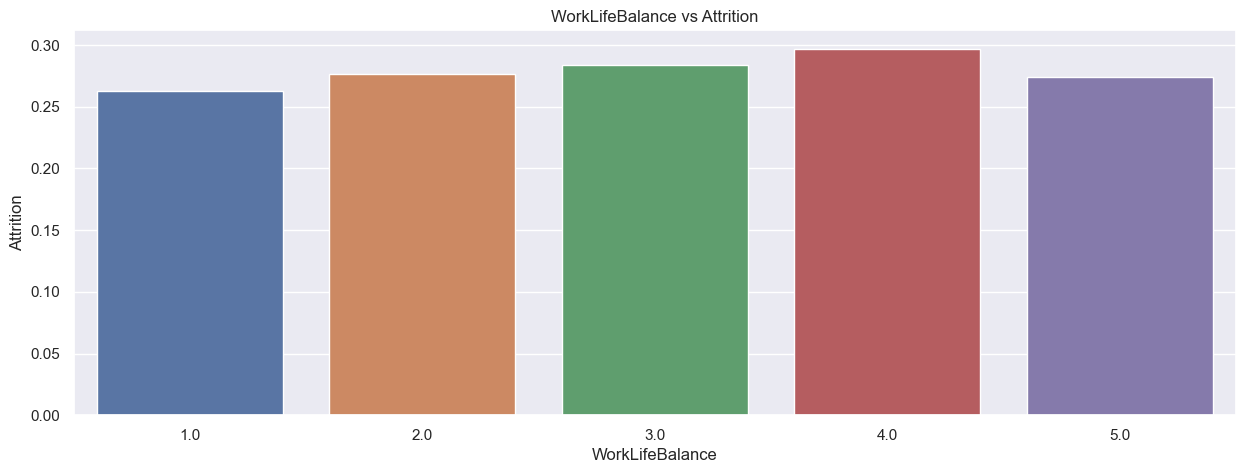

In [75]:
plt.figure(figsize = (15 , 5))
sns.barplot(x = df.groupby(df['WorkLifeBalance']).Attrition.mean().index , y = df.groupby(df['WorkLifeBalance']).Attrition.mean().values)
plt.xlabel('WorkLifeBalance')
plt.ylabel('Attrition')
plt.title('WorkLifeBalance vs Attrition')
plt.show()

##### Insights : More worklifebalance has more attrition rate like 3 , 4 , 5. so worklifebalance has not large impact on attrition(there is impact but not large)

##### Designation

In [76]:
pd.DataFrame(df.groupby(['Designation']).Attrition.mean())

,Attrition
Designation,
AVP,0.079268
Executive,0.410714
Manager,0.190205
Senior Manager,0.243775
VP,0.125561


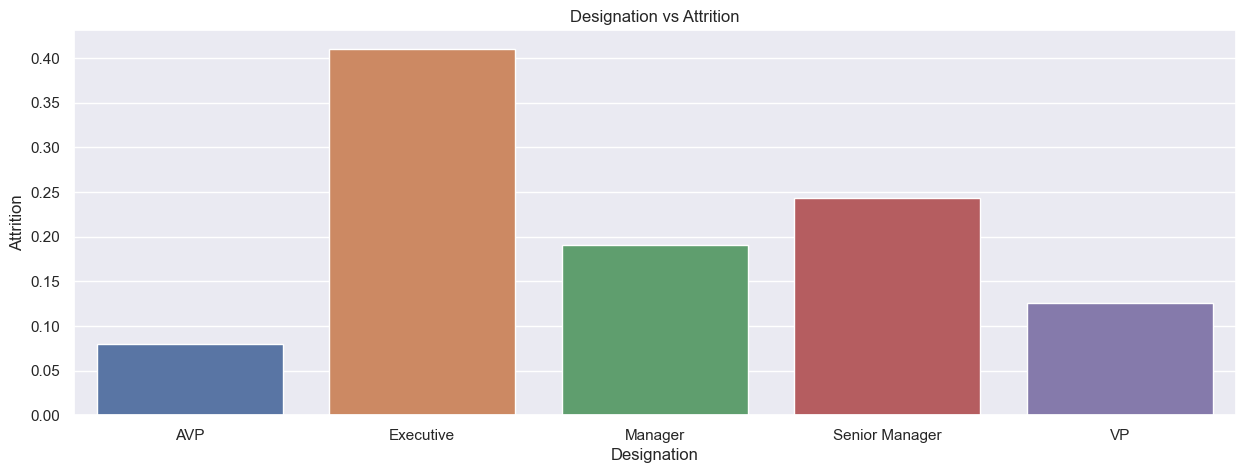

In [77]:
plt.figure(figsize = (15 , 5))
sns.barplot(x = df.groupby(df['Designation']).Attrition.mean().index , y = df.groupby(df['Designation']).Attrition.mean().values)
plt.xlabel('Designation')
plt.ylabel('Attrition')
plt.title('Designation vs Attrition')
plt.show()

###### Insights : Executive designation employees are more attrition rate

##### JobSatisfaction

In [78]:
pd.DataFrame(df.groupby(df['JobSatisfaction']).Attrition.mean())

,Attrition
JobSatisfaction,
1.0,0.201889
2.0,0.203366
3.0,0.291026
4.0,0.268394
5.0,0.379909


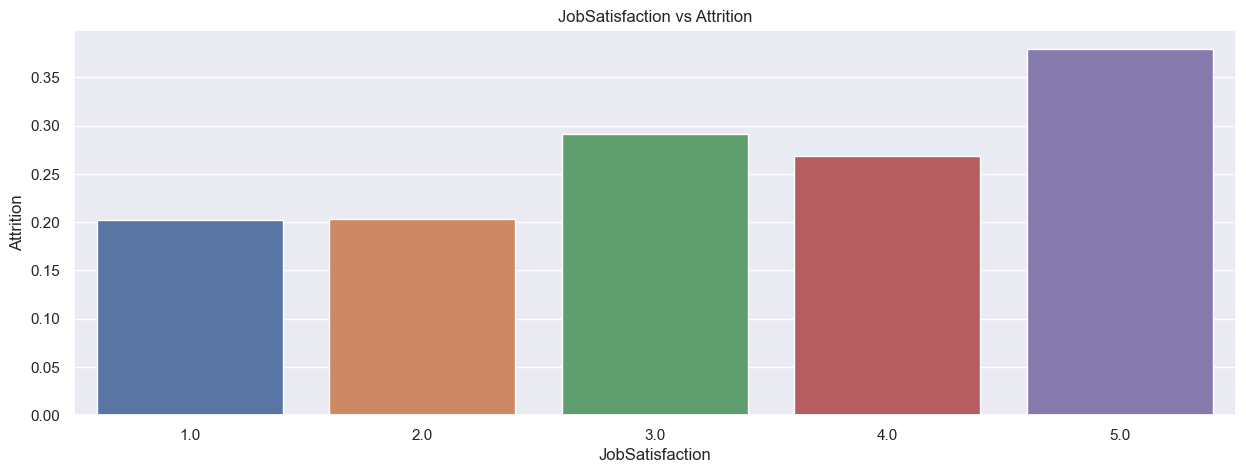

In [79]:
plt.figure(figsize = (15 , 5))
sns.barplot(x = df.groupby(df['JobSatisfaction']).Attrition.mean().index , y = df.groupby(df['JobSatisfaction']).Attrition.mean().values)
plt.xlabel('JobSatisfaction')
plt.ylabel('Attrition')
plt.title('JobSatisfaction vs Attrition')
plt.show()

##### Insights : who has highest job satisfaction people has highest attrition rate also

##### ESOPs

In [80]:
pd.DataFrame(df.groupby(df['ESOPs']).Attrition.mean())

,Attrition
ESOPs,
0.0,0.273588
1.0,0.284534


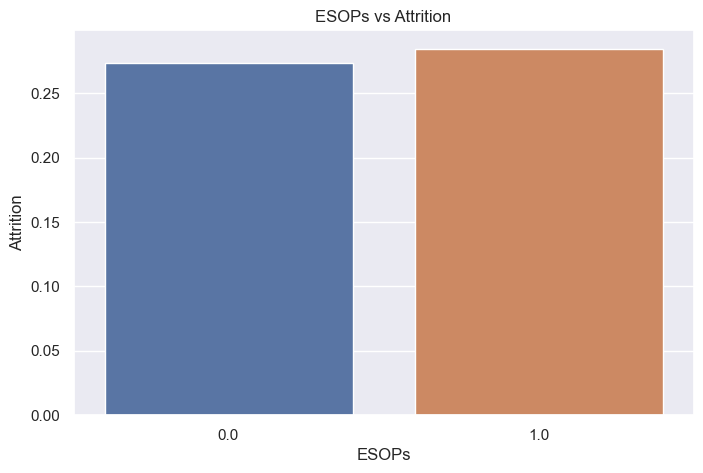

In [81]:
plt.figure(figsize = (8 , 5))
sns.barplot(x = df.groupby(df['ESOPs']).Attrition.mean().index , y = df.groupby(df['ESOPs']).Attrition.mean().values)
plt.xlabel('ESOPs')
plt.ylabel('Attrition')
plt.title('ESOPs vs Attrition')
plt.show()

##### Insights : Here 50 - 50 in esops. who has Employee stock ownership plan that employees also have high attition rate(not much difference in no and yes)

##### NumCompaniesWorked

In [82]:
pd.DataFrame(df.groupby(df['NumCompaniesWorked']).Attrition.mean())

,Attrition
NumCompaniesWorked,
0.0,0.220159
1.0,0.286131
2.0,0.293956
3.0,0.202020
4.0,0.204771
5.0,0.289773
6.0,0.387352
7.0,0.375000
8.0,0.294737


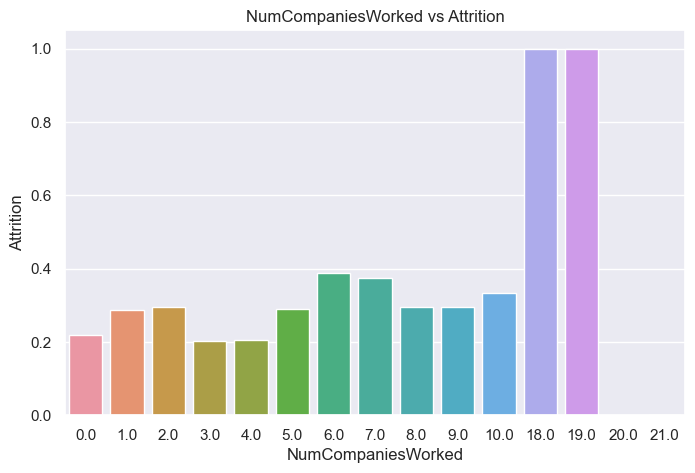

In [83]:
plt.figure(figsize = (8 , 5))
sns.barplot(x = df.groupby(df['NumCompaniesWorked']).Attrition.mean().index , y = df.groupby(df['NumCompaniesWorked']).Attrition.mean().values)
plt.xlabel('NumCompaniesWorked')
plt.ylabel('Attrition')
plt.title('NumCompaniesWorked vs Attrition')
plt.show()

###### Insights : Experience get increases and Attrition get increase means there is might be possibility  experienced peoples are always looking for best oppotunity

###### OverTime

In [84]:
pd.DataFrame(df.groupby(df['OverTime']).Attrition.mean())

,Attrition
OverTime,
0.0,0.193757
1.0,0.465517


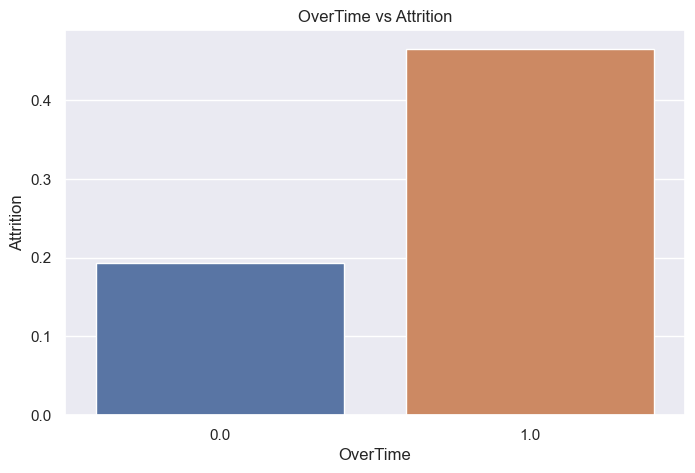

In [85]:
plt.figure(figsize = (8 , 5))
sns.barplot(x = df.groupby(df['OverTime']).Attrition.mean().index , y = df.groupby(df['OverTime']).Attrition.mean().values)
plt.xlabel('OverTime')
plt.ylabel('Attrition')
plt.title('OverTime vs Attrition')
plt.show()

##### Insights : OverTime employee has more attrition rate. this is very important feature for understanding attrition

##### SalaryHikelastYear

In [86]:
pd.DataFrame(df.groupby(['SalaryHikelastYear']).Attrition.mean())

,Attrition
SalaryHikelastYear,
16.0,0.317422
17.0,0.304654
18.0,0.288922
19.0,0.252941
20.0,0.242063
21.0,0.326389
22.0,0.287273
23.0,0.287625
24.0,0.229965


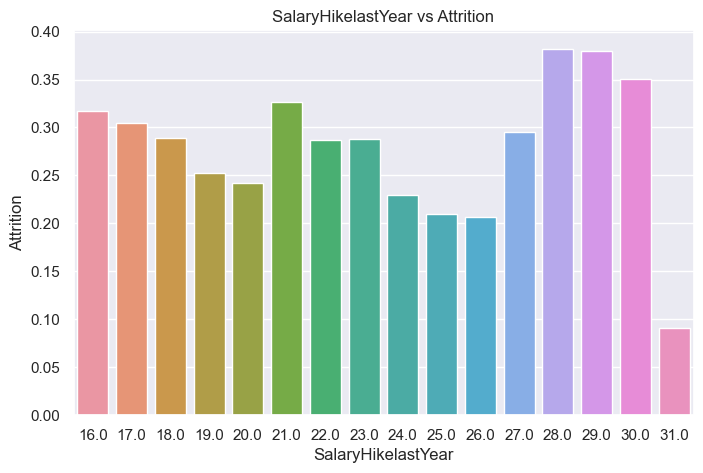

In [87]:
plt.figure(figsize = (8 , 5))
sns.barplot(x = df.groupby(df['SalaryHikelastYear']).Attrition.mean().index , y = df.groupby(df['SalaryHikelastYear']).Attrition.mean().values)
plt.xlabel('SalaryHikelastYear')
plt.ylabel('Attrition')
plt.title('SalaryHikelastYear vs Attrition')
plt.show()

##### Insights : Less hike rate has more attrition rate. this also impactful factor for attrition

### WorkExperience

In [88]:
pd.DataFrame(df.groupby(df['WorkExperience']).Attrition.mean())

,Attrition
WorkExperience,
0.0,0.620690
1.0,0.646288
2.0,0.626728
3.0,0.394904
4.0,0.328358
5.0,0.309859
6.0,0.327456
7.0,0.307263
8.0,0.295732


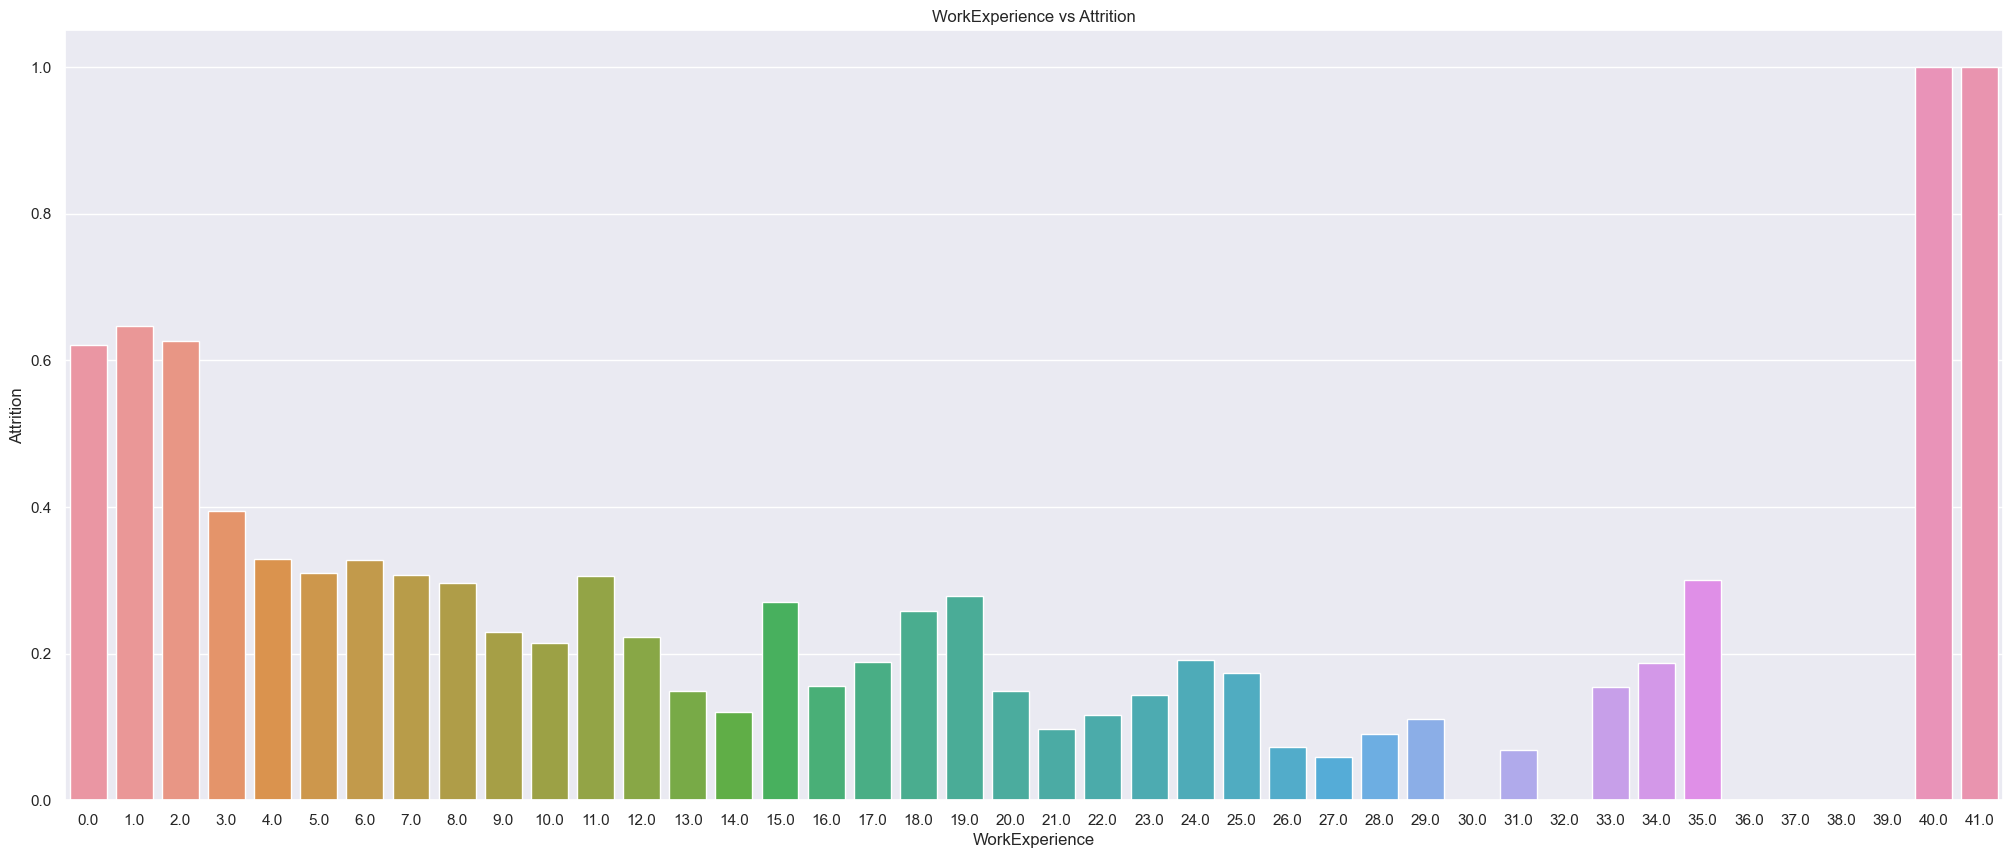

In [89]:
plt.figure(figsize = (25 , 10))
sns.barplot(x = df.groupby(df['WorkExperience']).Attrition.mean().index , y = df.groupby(df['WorkExperience']).Attrition.mean().values)
plt.xlabel('WorkExperience')
plt.ylabel('Attrition')
plt.title('WorkExperience vs Attrition')
plt.show()

##### Insights : from workexperience , less experience employee has more attrition rate like 0 , 1 , 2 years and  3 to 7 years like and more experience employee has less attrition rate like 26 to 41 years.

##### LastPromotion

In [90]:
pd.DataFrame(df.groupby(df['LastPromotion']).Attrition.mean())

,Attrition
LastPromotion,
0.0,0.308909
1.0,0.302973
2.0,0.247017
3.0,0.281609
4.0,0.205556
5.0,0.113772
6.0,0.153846
7.0,0.341346
8.0,0.330827


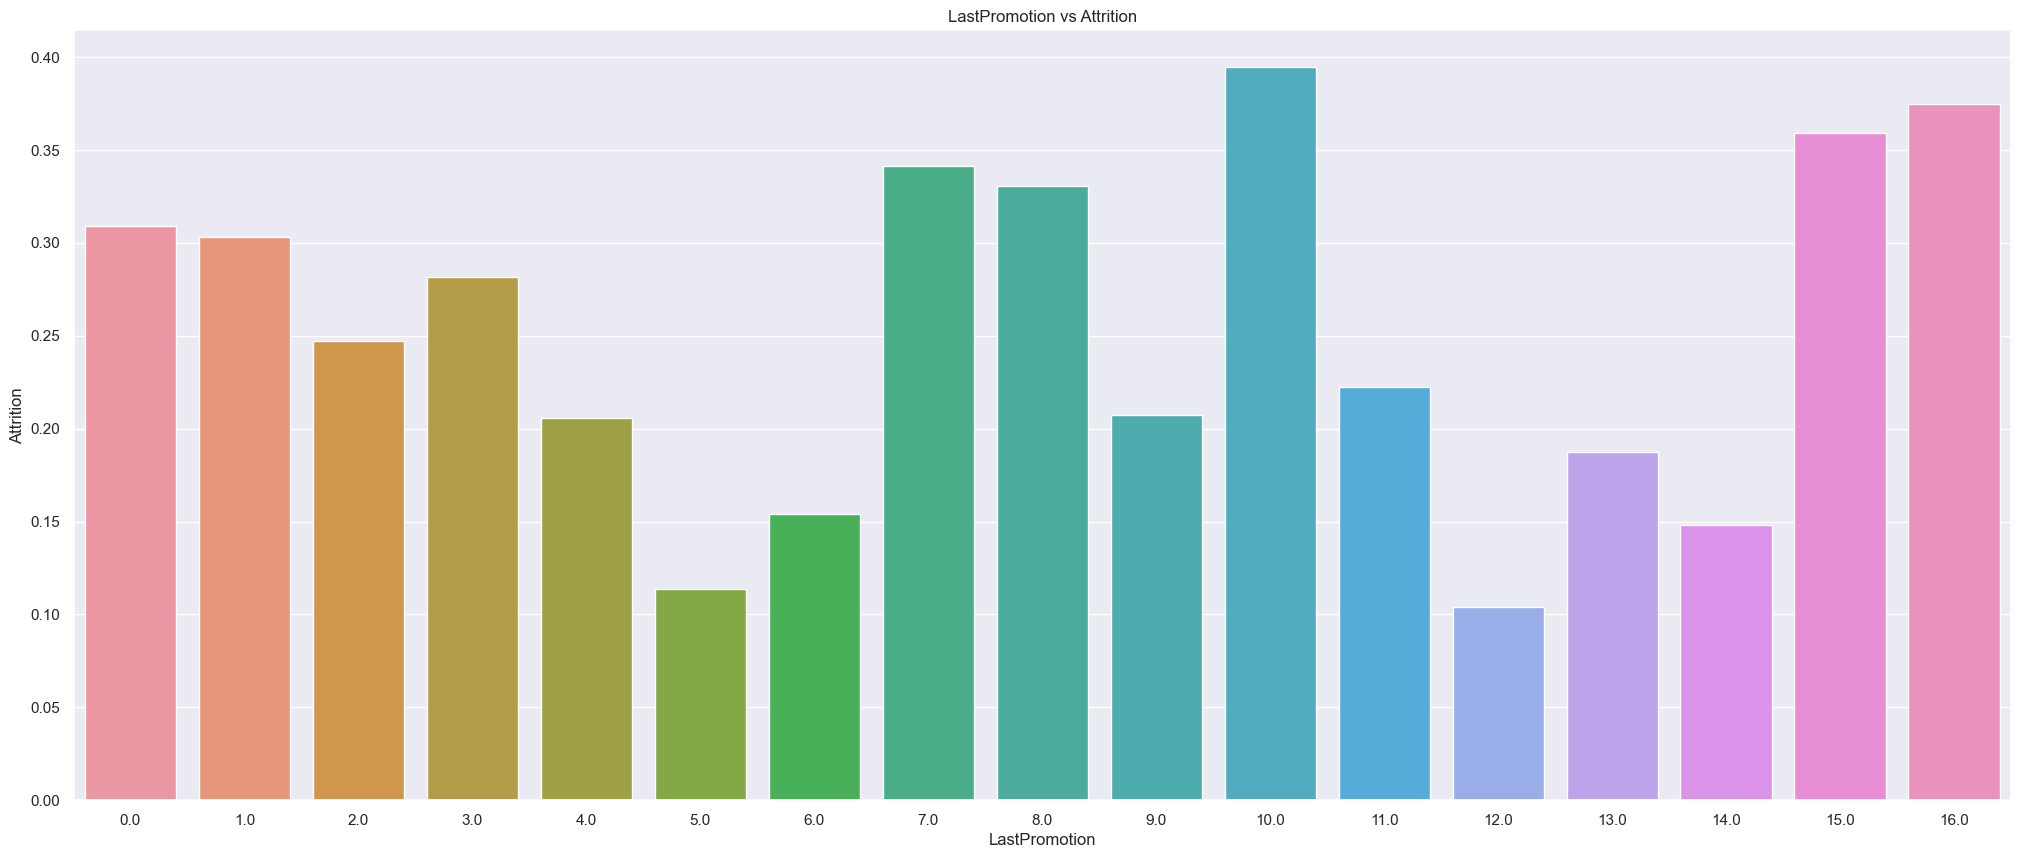

In [91]:
plt.figure(figsize = (25 , 10))
sns.barplot(x = df.groupby(df['LastPromotion']).Attrition.mean().index , y = df.groupby(df['LastPromotion']).Attrition.mean().values)
plt.xlabel('LastPromotion')
plt.ylabel('Attrition')
plt.title('LastPromotion vs Attrition')
plt.show()

##### Insights : From LastPromotion we get , very early experience employee like 0 and 1 and middle experience candidate like 8 and 9  and high experience employee like 15 and 16 years has high attrition rate 

####  CurrentProfile

In [92]:
pd.DataFrame(df.groupby(df['CurrentProfile']).Attrition.mean())

,Attrition
CurrentProfile,
0.0,0.488782
1.0,0.443015
2.0,0.252427
3.0,0.233196
4.0,0.230563
5.0,0.215789
6.0,0.247423
7.0,0.255269
8.0,0.224490


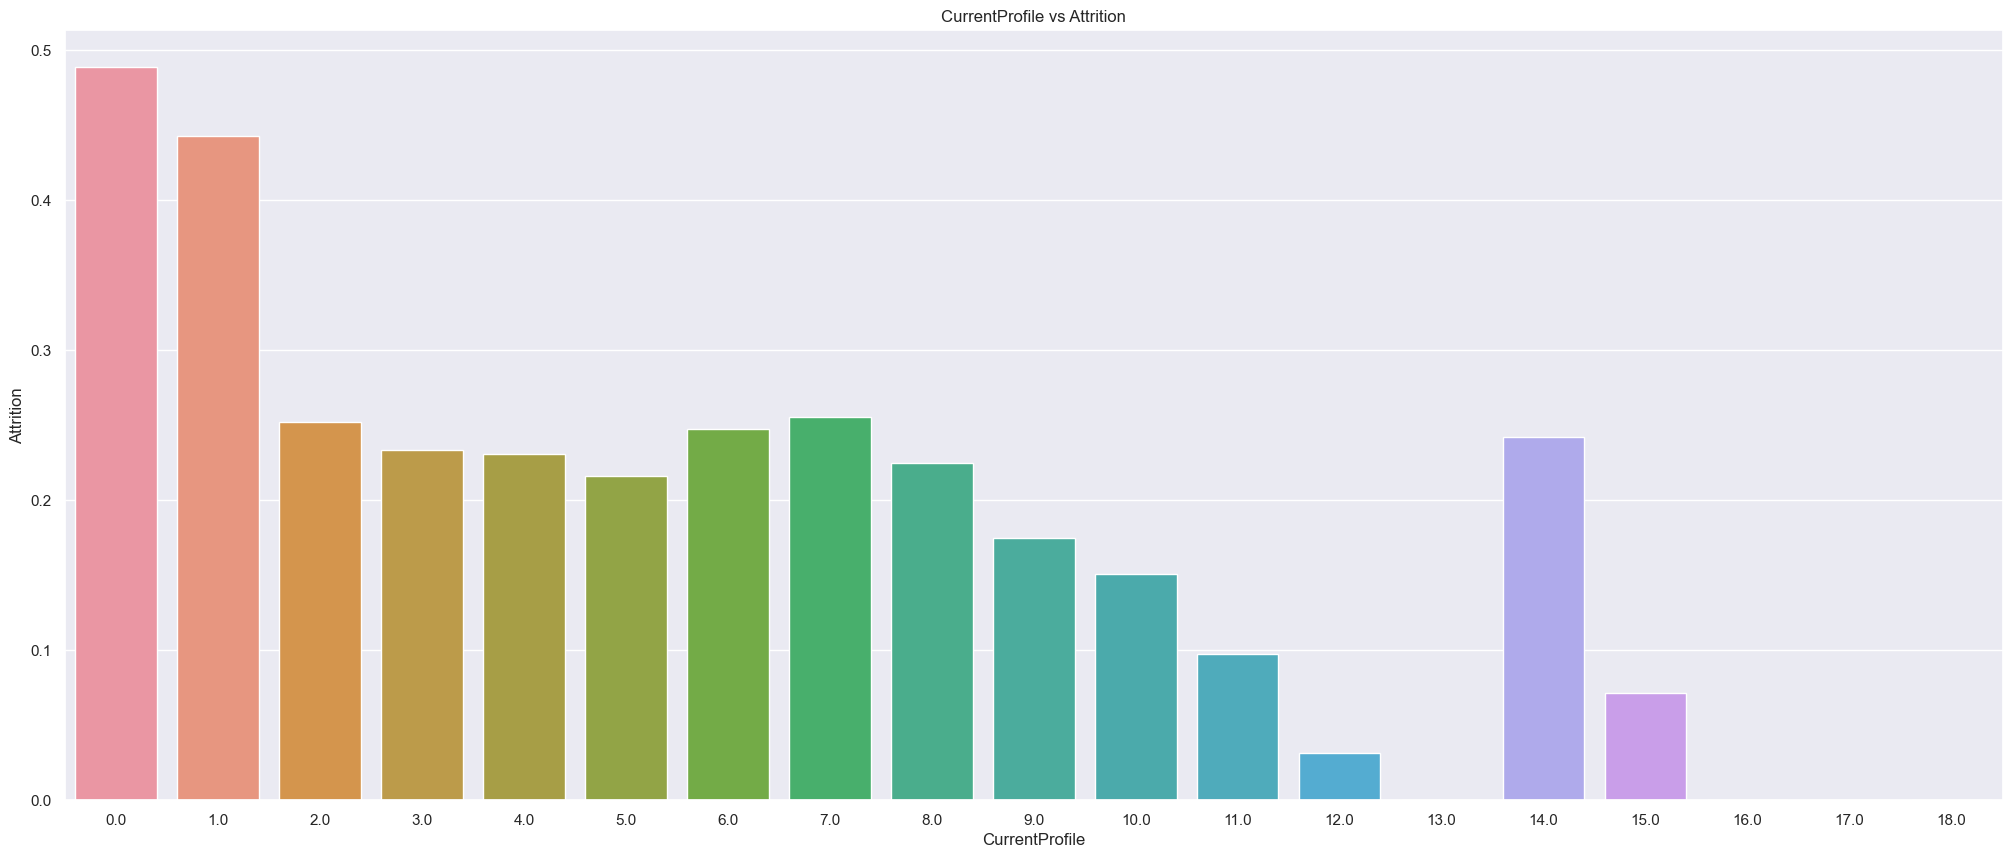

In [93]:
plt.figure(figsize = (25 , 10))
sns.barplot(x = df.groupby(df['CurrentProfile']).Attrition.mean().index , y = df.groupby(df['CurrentProfile']).Attrition.mean().values)
plt.xlabel('CurrentProfile')
plt.ylabel('Attrition')
plt.title('CurrentProfile vs Attrition')
plt.show()

#### CurrentProfile : From CurrentProfile , who has just completed 0 and 1 year on current profile has high attrition rate . when increase no of years on CurrentProfile has decrease attrition rate

##### MaritalStatus

In [94]:
pd.DataFrame(df.groupby(df['MaritalStatus']).Attrition.mean())

,Attrition
MaritalStatus,
Divorsed,0.229331
Married,0.198911
Single,0.414977


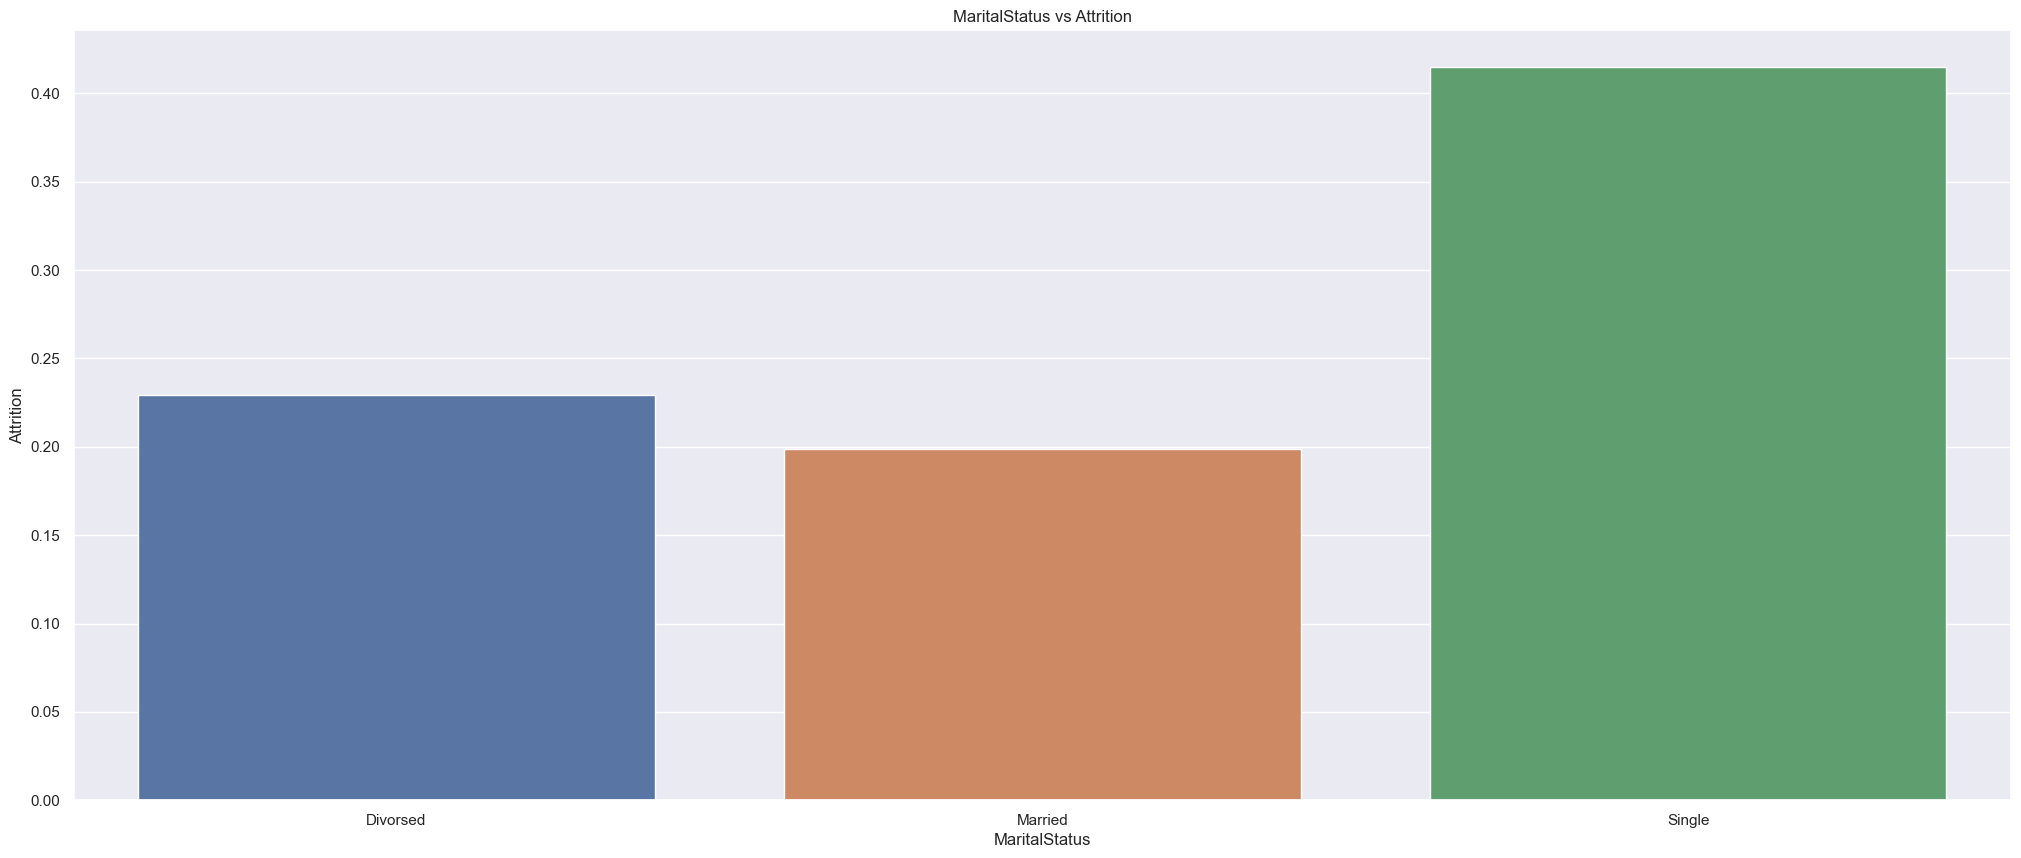

In [95]:
plt.figure(figsize = (25 , 10))
sns.barplot(x = df.groupby(df['MaritalStatus']).Attrition.mean().index , y = df.groupby(df['MaritalStatus']).Attrition.mean().values)
plt.xlabel('MaritalStatus')
plt.ylabel('Attrition')
plt.title('MaritalStatus vs Attrition')
plt.show()

###### Insights : Single or bachler employee has more attrition rate as compare to others. they might be looking for better oppotunity as like in SalaryHike also

#####  MonthlyIncome

In [96]:
pd.DataFrame(df.groupby(df['MonthlyIncome']).Attrition.mean())

,Attrition
MonthlyIncome,
1000.0,0.0
2000.0,NaN
16009.0,1.0
16051.0,0.0
16052.0,0.0
...,...
35943.0,0.0
35973.0,0.0
35999.0,0.0


In [97]:
# plt.figure(figsize = (25 , 10))
# sns.barplot(x = df.groupby(df['MonthlyIncome']).Attrition.mean().index , y = df.groupby(df['MonthlyIncome']).Attrition.mean().values)
# plt.xlabel('MonthlyIncome')
# plt.ylabel('Attrition')
# plt.title('MonthlyIncome vs Attrition')
# plt.show()

## Bivariate Analysis

In [98]:
# sns.set_style('whitegrid')
# sns.pairplot(df , diag_kind = 'kde' , hue = 'Attrition')
# plt.show()

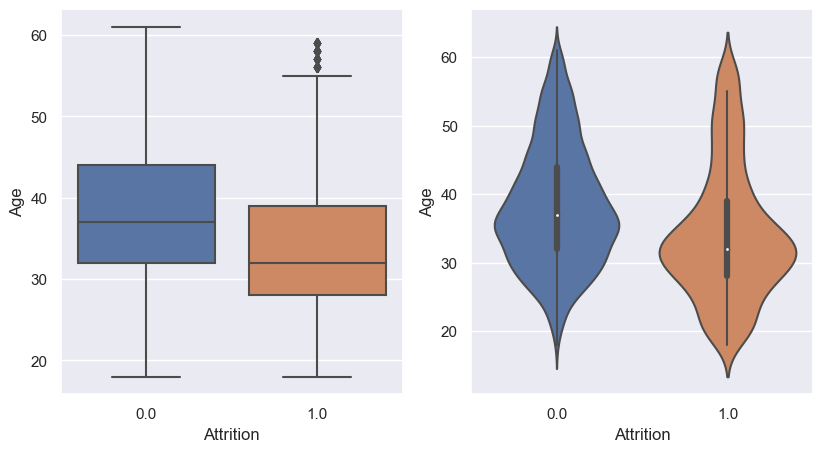

In [99]:
plt.figure(figsize = (15 , 5))
plt.subplot(1,3,1)
sns.boxplot(x = df['Attrition'] , y = df['Age'] , data = df , order = df['Attrition'].value_counts().index)
plt.subplot(1,3,2)
sns.violinplot(x = df['Attrition'] , y = df['Age'] , data = df , order = df['Attrition'].value_counts().index)
plt.show()
# plt.subplot(1,3,3)
# sns.stripplot(x = df['Attrition'] , y = df['Age'] , data = df , order = df['Attrition'].value_counts().index)
# plt.show()

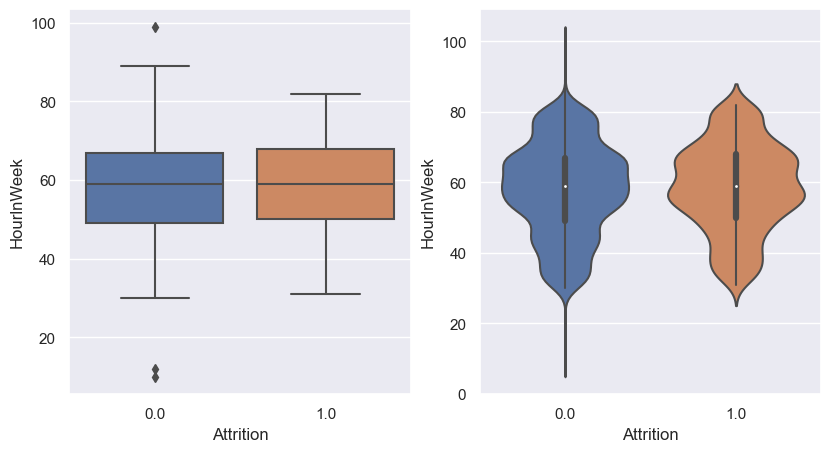

In [100]:
plt.figure(figsize = (15 , 5))
plt.subplot(1,3,1)
sns.boxplot(x = df['Attrition'] , y = df['HourlnWeek'] , data = df , order = df['Attrition'].value_counts().index)
plt.subplot(1,3,2)
sns.violinplot(x = df['Attrition'] , y = df['HourlnWeek'] , data = df , order = df['Attrition'].value_counts().index)
plt.show()
#plt.subplot(1,3,3)
#sns.stripplot(x = df['Attrition'] , y = df['HourlnWeek'] , data = df , order = df['Attrition'].value_counts().index)

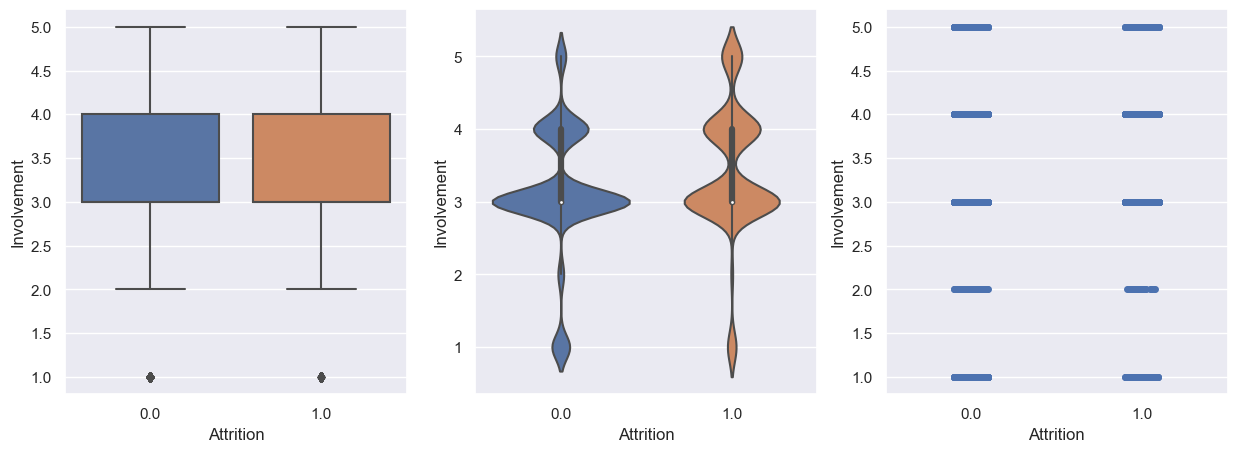

In [101]:
plt.figure(figsize = (15 , 5))
plt.subplot(1,3,1)
sns.boxplot(x = df['Attrition'] , y = df['Involvement'] , data = df , order = df['Attrition'].value_counts().index)
plt.subplot(1,3,2)
sns.violinplot(x = df['Attrition'] , y = df['Involvement'] , data = df , order = df['Attrition'].value_counts().index)
plt.subplot(1,3,3)
sns.stripplot(x = df['Attrition'] , y = df['Involvement'] , data = df , order = df['Attrition'].value_counts().index)
plt.show()

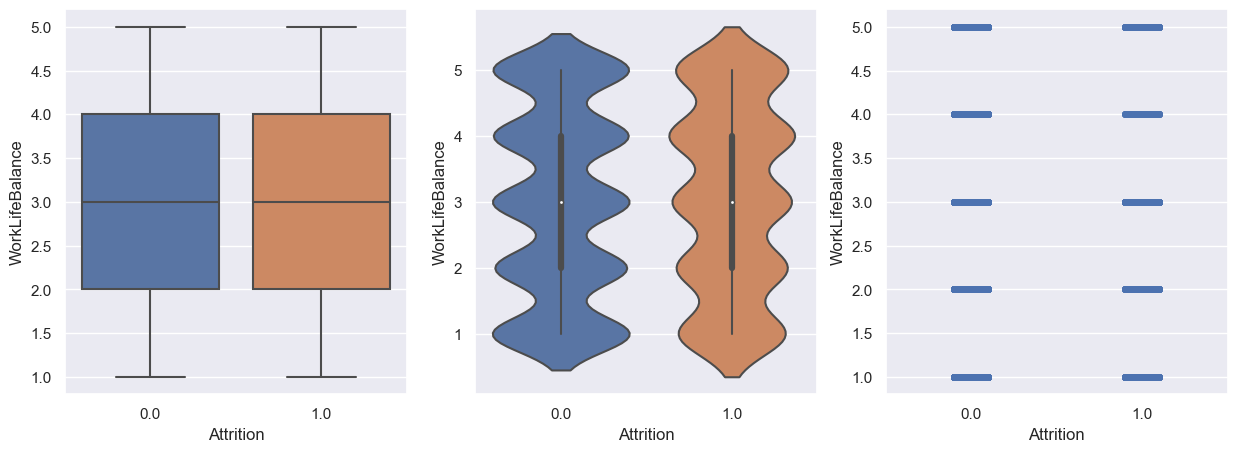

In [102]:
plt.figure(figsize = (15 , 5))
plt.subplot(1,3,1)
sns.boxplot(x = df['Attrition'] , y = df['WorkLifeBalance'] , data = df , order = df['Attrition'].value_counts().index)
plt.subplot(1,3,2)
sns.violinplot(x = df['Attrition'] , y = df['WorkLifeBalance'] , data = df , order = df['Attrition'].value_counts().index)
plt.subplot(1,3,3)
sns.stripplot(x = df['Attrition'] , y = df['WorkLifeBalance'] , data = df , order = df['Attrition'].value_counts().index)
plt.show()

### Multivariate Analysis

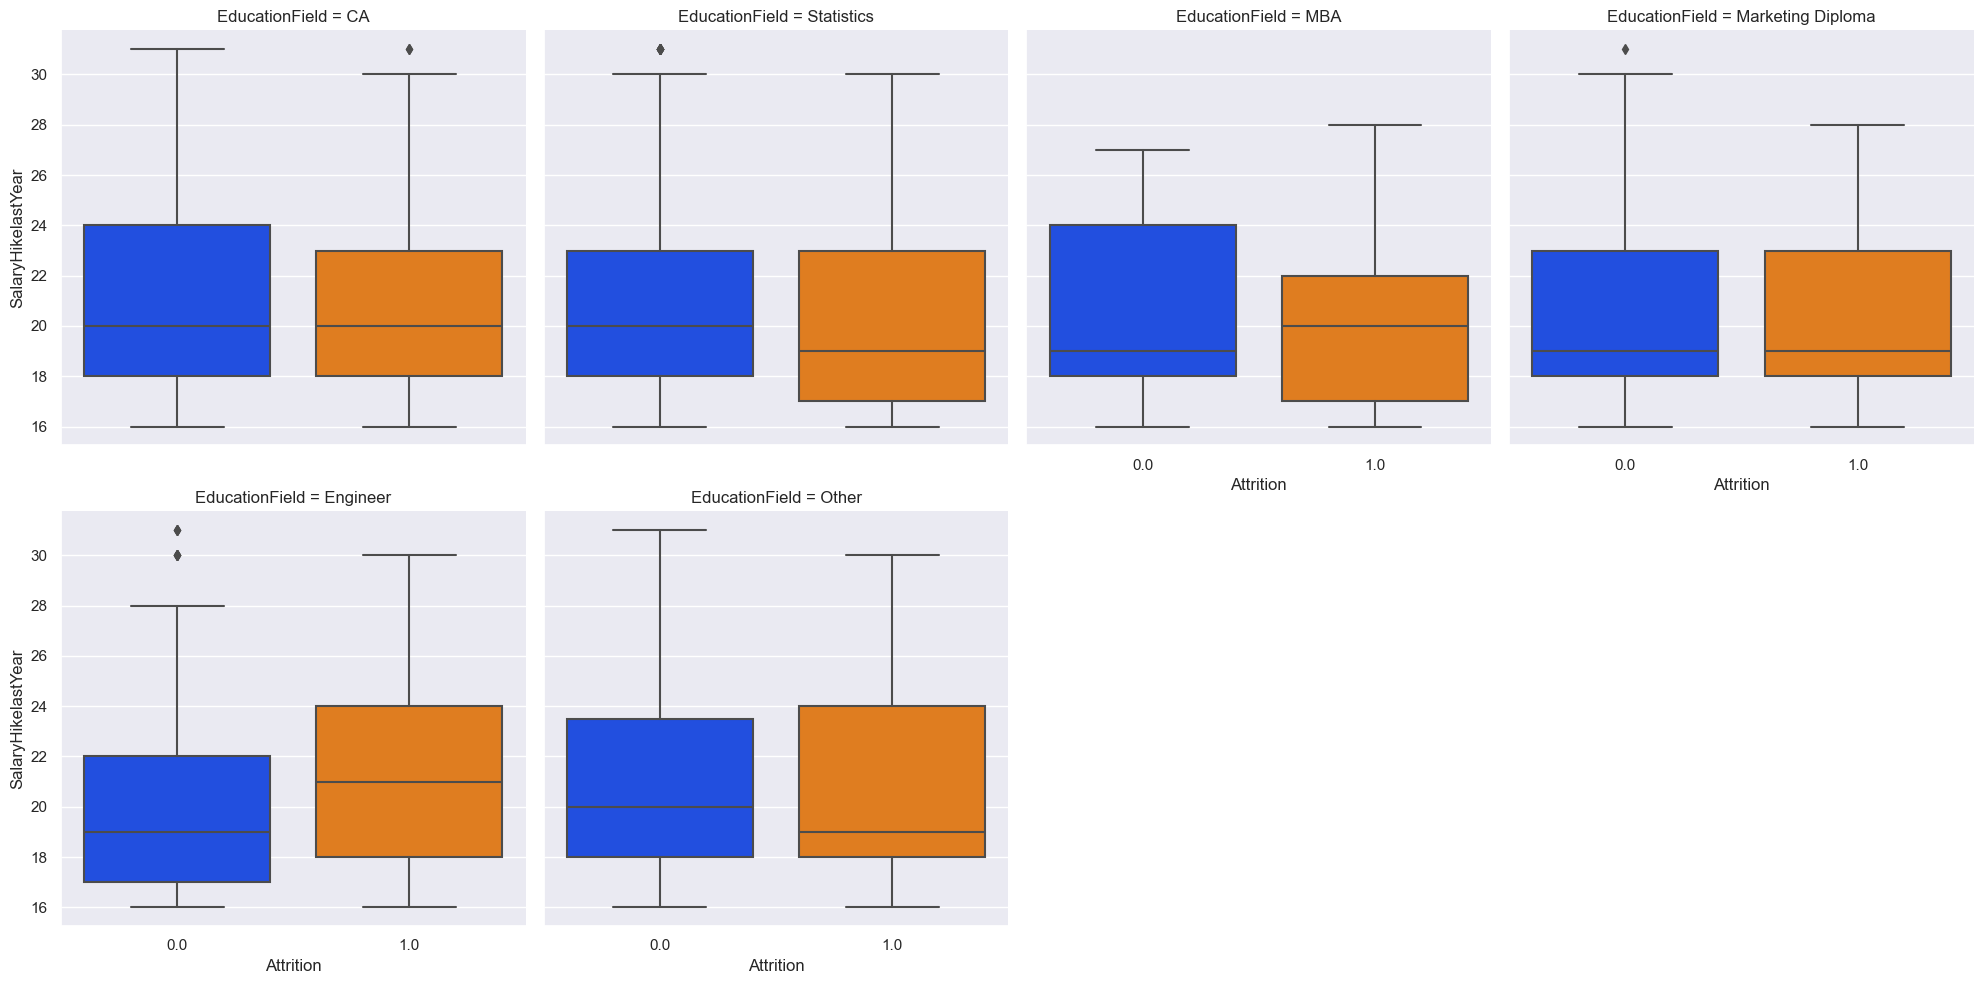

In [103]:
f = sns.catplot(x = 'Attrition' , y = 'SalaryHikelastYear', col = 'EducationField',col_wrap=4,data = df , kind = 'box' , palette = 'bright' , aspect = 1 )
plt.show()

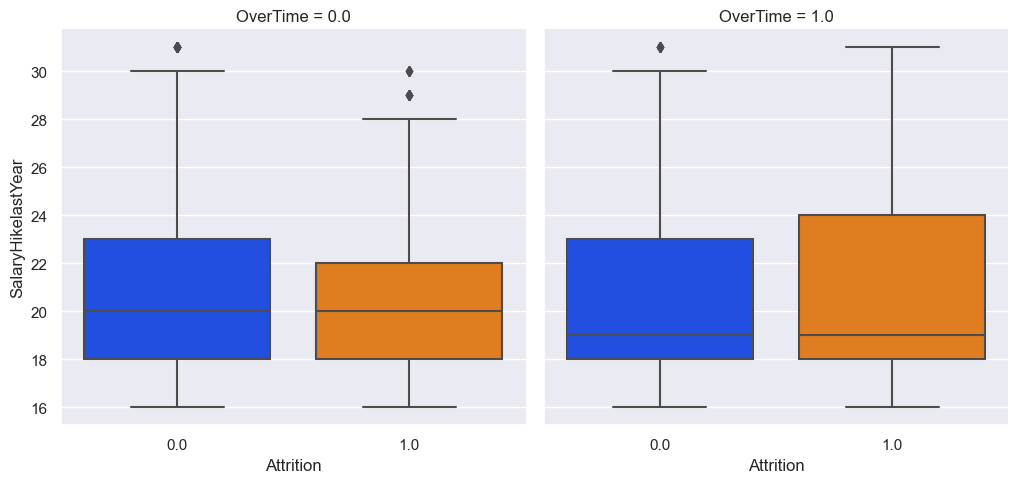

In [104]:
f = sns.catplot(x = 'Attrition' , y = 'SalaryHikelastYear', col = 'OverTime',col_wrap=4,data = df , kind = 'box' , palette = 'bright' , aspect = 1 )
plt.show()

##### Check Distribution of dataset

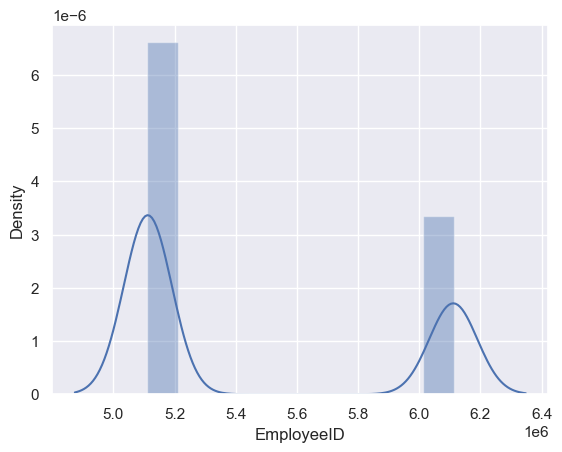

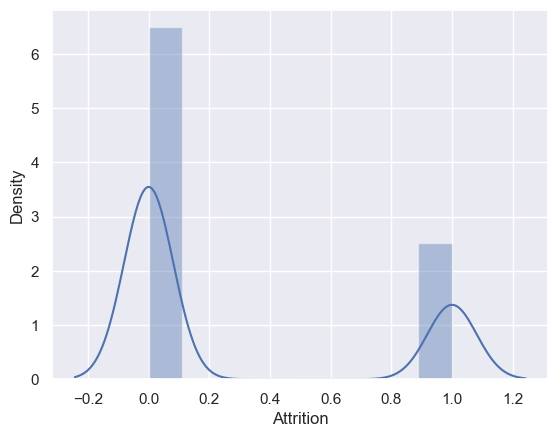

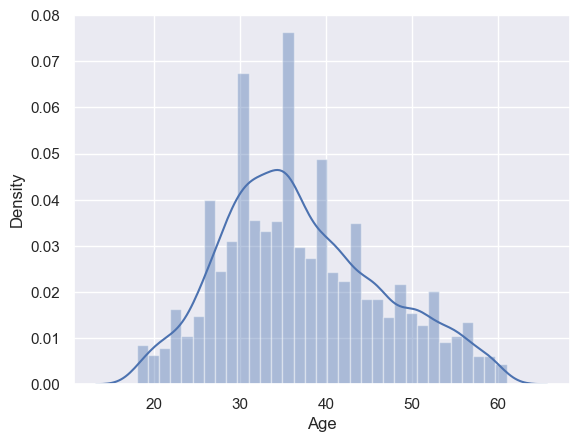

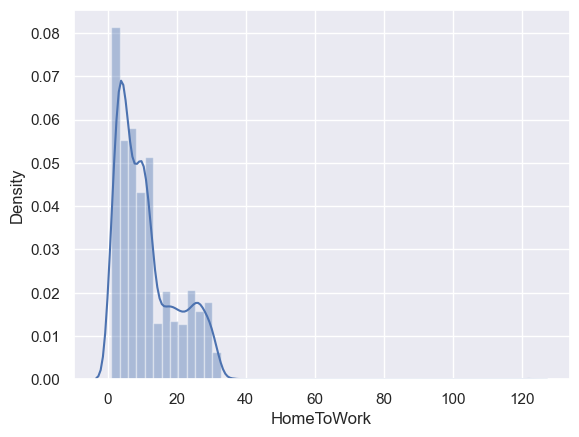

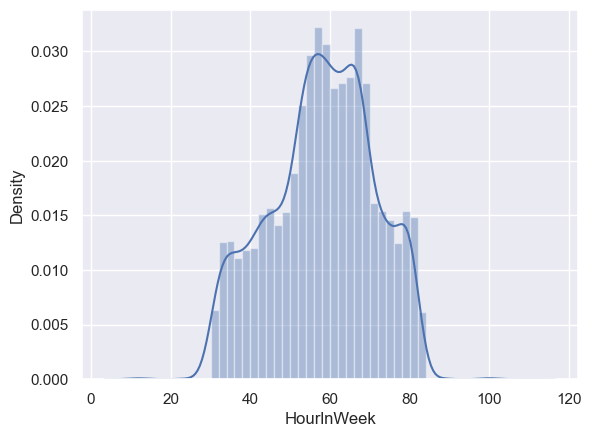

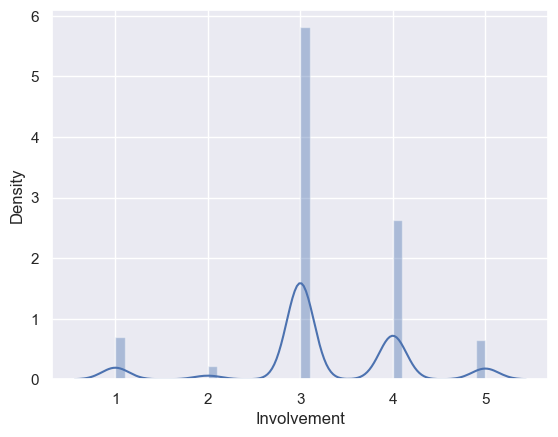

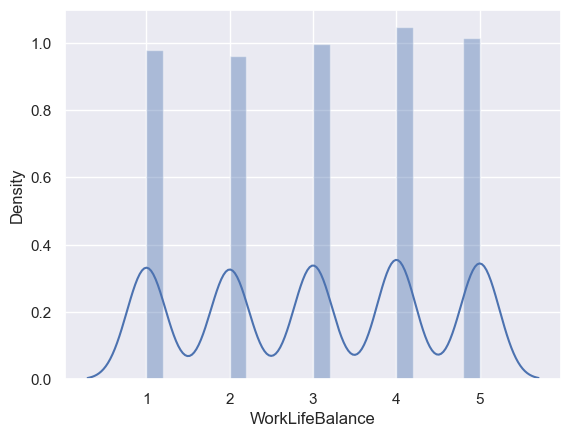

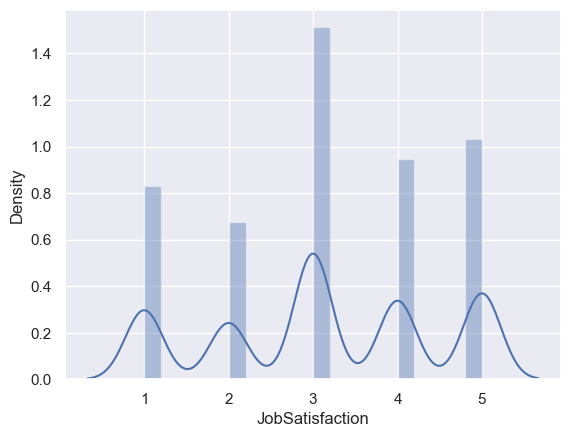

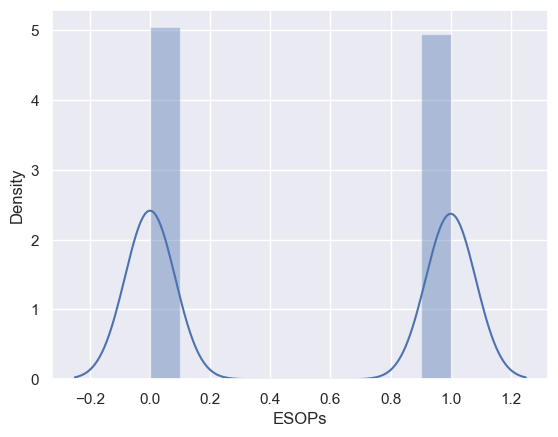

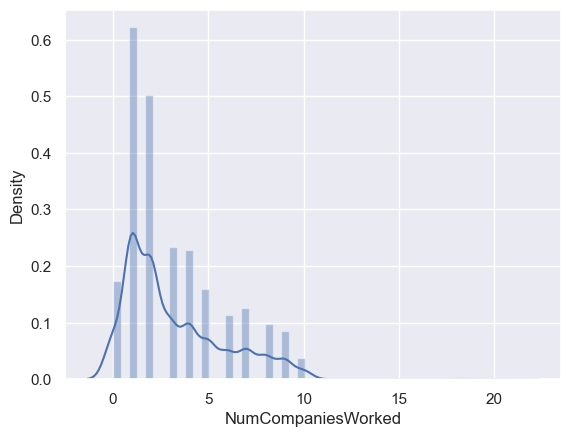

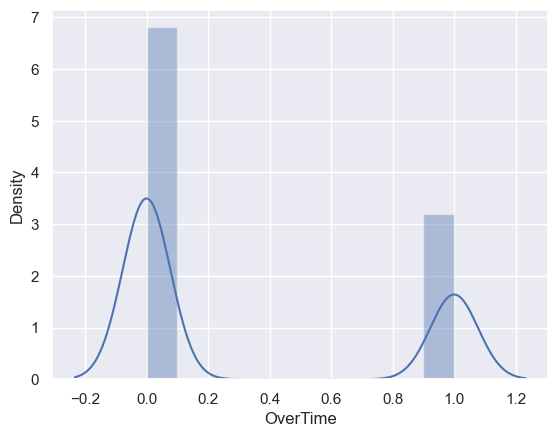

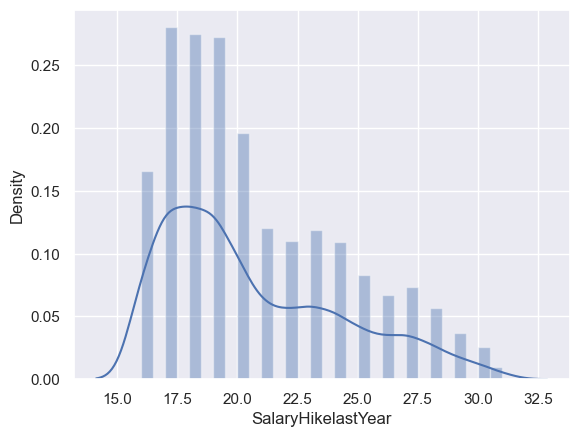

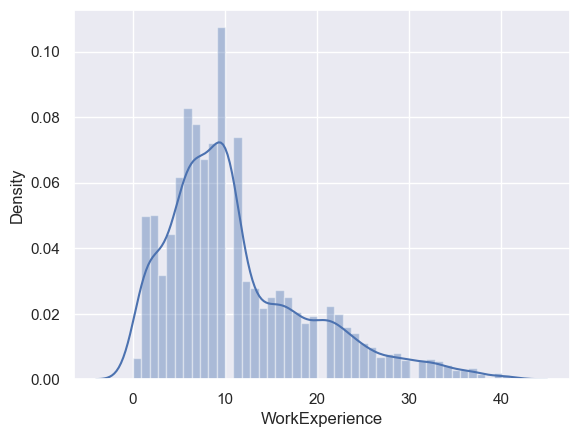

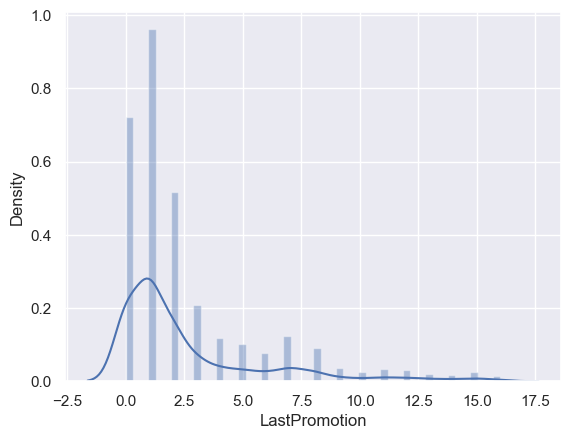

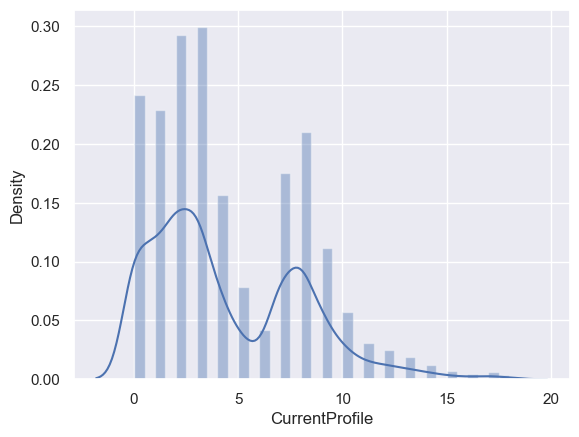

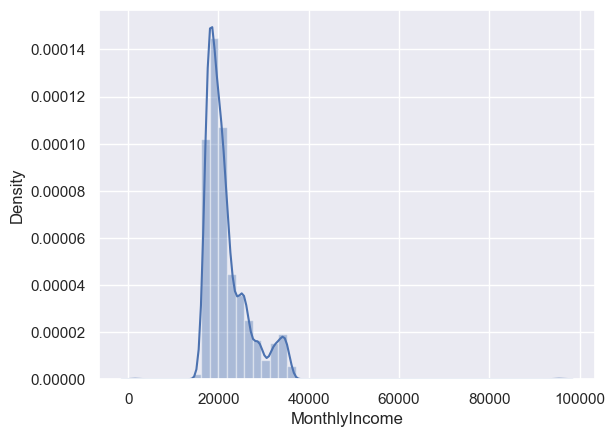

In [105]:
for col in df[numeric_col]:
    
    sns.distplot(df[col])
    plt.show()

###### Check Skewed Data

In [106]:
df.skew()

EmployeeID            0.690986
Attrition             0.986012
Age                   0.404413
HomeToWork            1.371473
HourlnWeek           -0.202931
Involvement          -0.511594
WorkLifeBalance      -0.040385
JobSatisfaction      -0.145534
ESOPs                 0.018442
NumCompaniesWorked    1.124742
OverTime              0.776439
SalaryHikelastYear    0.796312
WorkExperience        1.146616
LastPromotion         1.942926
CurrentProfile        0.800545
MonthlyIncome         2.507370
dtype: float64

## Feature Transformation (Data Preprocessing

###### 1.Handling Missing Values

In [107]:
df.isnull().sum()

EmployeeID               0
Attrition             2630
Age                    458
TravelProfile            0
Department             182
HomeToWork             381
EducationField           0
Gender                  76
HourlnWeek             423
Involvement              0
WorkLifeBalance          0
Designation             68
JobSatisfaction          0
ESOPs                    0
NumCompaniesWorked       0
OverTime                 0
SalaryHikelastYear     263
WorkExperience         309
LastPromotion          127
CurrentProfile         445
MaritalStatus            0
MonthlyIncome          126
Data                     0
dtype: int64

In [108]:
df.isnull().sum()/len(df) * 100

EmployeeID             0.000000
Attrition             33.674776
Age                    5.864277
TravelProfile          0.000000
Department             2.330346
HomeToWork             4.878361
EducationField         0.000000
Gender                 0.973111
HourlnWeek             5.416133
Involvement            0.000000
WorkLifeBalance        0.000000
Designation            0.870679
JobSatisfaction        0.000000
ESOPs                  0.000000
NumCompaniesWorked     0.000000
OverTime               0.000000
SalaryHikelastYear     3.367478
WorkExperience         3.956466
LastPromotion          1.626120
CurrentProfile         5.697823
MaritalStatus          0.000000
MonthlyIncome          1.613316
Data                   0.000000
dtype: float64

#### In our Dataset almots all features are not a normally distributed so mean imputation is not proper option for imputation. then what we decide we will go with median imputaion when data is numeric and when data is categorical then we will do it by mode

###### Median Imputation for numeric features

In [109]:
for col in df[numeric_col]:
    
    #print(col , ': ' , df[col].median())
    
    df[col].fillna(df[col].median() , inplace = True)
    

##### Mode Imputation for character features

In [110]:
for col in df[character_col]:
    
    #print(col , ':' , df[col].mode()[0])
    
    df[col].fillna(df[col].mode()[0] , inplace = True)

##### Check Imputation is done

In [111]:
df.isnull().sum()

EmployeeID            0
Attrition             0
Age                   0
TravelProfile         0
Department            0
HomeToWork            0
EducationField        0
Gender                0
HourlnWeek            0
Involvement           0
WorkLifeBalance       0
Designation           0
JobSatisfaction       0
ESOPs                 0
NumCompaniesWorked    0
OverTime              0
SalaryHikelastYear    0
WorkExperience        0
LastPromotion         0
CurrentProfile        0
MaritalStatus         0
MonthlyIncome         0
Data                  0
dtype: int64

### Handling Missing Value is Done

### 2. Handling Character value

In [112]:
df[character_col].head(2)

,TravelProfile,Department,EducationField,Gender,Designation,MaritalStatus
0,Rarely,Analytics,CA,Male,Executive,Married
1,Yes,Sales,Statistics,Female,Executive,Single


In [113]:
for col in df[character_col].columns:
    print(col , ':' , df[col].value_counts())

TravelProfile : Rarely    5489
Yes       1580
No         741
Name: TravelProfile, dtype: int64
Department : Analytics    5076
Sales        2407
Marketing     327
Name: Department, dtype: int64
EducationField : Statistics           3169
CA                   2417
Marketing Diploma     894
Engineer              750
Other                 429
MBA                   151
Name: EducationField, dtype: int64
Gender : Male      4744
Female    3066
Name: Gender, dtype: int64
Designation : Executive         3133
Manager           2676
Senior Manager    1154
AVP                507
VP                 340
Name: Designation, dtype: int64
MaritalStatus : Married     3608
Single      2709
Divorsed    1493
Name: MaritalStatus, dtype: int64


In [114]:
label = LabelEncoder()

In [115]:
for col in df[character_col].columns:
    
    df[col] = label.fit_transform(df[col])

In [116]:
for col in df[character_col].columns:
    print(col , ':' , df[col].value_counts())

TravelProfile : 1    5489
2    1580
0     741
Name: TravelProfile, dtype: int64
Department : 0    5076
2    2407
1     327
Name: Department, dtype: int64
EducationField : 5    3169
0    2417
3     894
1     750
4     429
2     151
Name: EducationField, dtype: int64
Gender : 1    4744
0    3066
Name: Gender, dtype: int64
Designation : 1    3133
2    2676
3    1154
0     507
4     340
Name: Designation, dtype: int64
MaritalStatus : 1    3608
2    2709
0    1493
Name: MaritalStatus, dtype: int64


In [117]:
df1 = df.copy()

In [118]:
df1.head(2)

,EmployeeID,Attrition,Age,TravelProfile,Department,HomeToWork,EducationField,Gender,HourlnWeek,Involvement,...,ESOPs,NumCompaniesWorked,OverTime,SalaryHikelastYear,WorkExperience,LastPromotion,CurrentProfile,MaritalStatus,MonthlyIncome,Data
0,5110001.0,0.0,35.0,1,0,5.0,0,1,69.0,1.0,...,1.0,1.0,1.0,20.0,7.0,2.0,3.0,1,18932.0,Train
1,5110002.0,1.0,32.0,2,2,5.0,5,0,62.0,4.0,...,0.0,8.0,0.0,20.0,4.0,1.0,3.0,2,18785.0,Train


### Back to original data because most of perprocessing is done

In [119]:
train = df[df['Data'] == 'Train']
test = df[df['Data'] == 'Test']

In [120]:
train.head(2)

,EmployeeID,Attrition,Age,TravelProfile,Department,HomeToWork,EducationField,Gender,HourlnWeek,Involvement,...,ESOPs,NumCompaniesWorked,OverTime,SalaryHikelastYear,WorkExperience,LastPromotion,CurrentProfile,MaritalStatus,MonthlyIncome,Data
0,5110001.0,0.0,35.0,1,0,5.0,0,1,69.0,1.0,...,1.0,1.0,1.0,20.0,7.0,2.0,3.0,1,18932.0,Train
1,5110002.0,1.0,32.0,2,2,5.0,5,0,62.0,4.0,...,0.0,8.0,0.0,20.0,4.0,1.0,3.0,2,18785.0,Train


In [121]:
test.head(2)

,EmployeeID,Attrition,Age,TravelProfile,Department,HomeToWork,EducationField,Gender,HourlnWeek,Involvement,...,ESOPs,NumCompaniesWorked,OverTime,SalaryHikelastYear,WorkExperience,LastPromotion,CurrentProfile,MaritalStatus,MonthlyIncome,Data
0,6110001.0,0.0,18.0,0,0,9.0,0,1,80.0,3.0,...,1.0,1.0,0.0,17.0,0.0,0.0,0.0,2,16904.0,Test
1,6110002.0,0.0,20.0,1,0,28.0,5,0,59.0,1.0,...,1.0,2.0,1.0,18.0,2.0,1.0,3.0,2,18994.0,Test


#### Shape

In [122]:
print(train.shape)
print(test.shape)

(5180, 23)
(2630, 23)


#### split into dependent and independent data

In [123]:
train.head(2)

,EmployeeID,Attrition,Age,TravelProfile,Department,HomeToWork,EducationField,Gender,HourlnWeek,Involvement,...,ESOPs,NumCompaniesWorked,OverTime,SalaryHikelastYear,WorkExperience,LastPromotion,CurrentProfile,MaritalStatus,MonthlyIncome,Data
0,5110001.0,0.0,35.0,1,0,5.0,0,1,69.0,1.0,...,1.0,1.0,1.0,20.0,7.0,2.0,3.0,1,18932.0,Train
1,5110002.0,1.0,32.0,2,2,5.0,5,0,62.0,4.0,...,0.0,8.0,0.0,20.0,4.0,1.0,3.0,2,18785.0,Train


In [124]:
x= train.drop(['EmployeeID' , 'Attrition' , 'Data'] , axis = 1)

In [125]:
y = train.iloc[: , 1]

In [126]:
x.head(2)

,Age,TravelProfile,Department,HomeToWork,EducationField,Gender,HourlnWeek,Involvement,WorkLifeBalance,Designation,JobSatisfaction,ESOPs,NumCompaniesWorked,OverTime,SalaryHikelastYear,WorkExperience,LastPromotion,CurrentProfile,MaritalStatus,MonthlyIncome
0,35.0,1,0,5.0,0,1,69.0,1.0,1.0,1,1.0,1.0,1.0,1.0,20.0,7.0,2.0,3.0,1,18932.0
1,32.0,2,2,5.0,5,0,62.0,4.0,3.0,1,2.0,0.0,8.0,0.0,20.0,4.0,1.0,3.0,2,18785.0


In [127]:
y.head(2)

0    0.0
1    1.0
Name: Attrition, dtype: float64

##### We dropping EmployeeID , Attrition and Data features from test data for make test data ready for passing the model

In [128]:
test.drop(['EmployeeID' ,'Attrition','Data'] , axis = 1 , inplace = True)

In [129]:
test.head(2)

,Age,TravelProfile,Department,HomeToWork,EducationField,Gender,HourlnWeek,Involvement,WorkLifeBalance,Designation,JobSatisfaction,ESOPs,NumCompaniesWorked,OverTime,SalaryHikelastYear,WorkExperience,LastPromotion,CurrentProfile,MaritalStatus,MonthlyIncome
0,18.0,0,0,9.0,0,1,80.0,3.0,2.0,1,3.0,1.0,1.0,0.0,17.0,0.0,0.0,0.0,2,16904.0
1,20.0,1,0,28.0,5,0,59.0,1.0,3.0,1,1.0,1.0,2.0,1.0,18.0,2.0,1.0,3.0,2,18994.0


In [130]:
print(train.shape)
print(test.shape)

(5180, 23)
(2630, 20)


### 4.Feature_scaling

In [131]:
from sklearn.preprocessing import StandardScaler

In [132]:
scaler = StandardScaler()

In [133]:
x_scaled = scaler.fit_transform(x)

##### scale test data

In [134]:
test.head(2)

,Age,TravelProfile,Department,HomeToWork,EducationField,Gender,HourlnWeek,Involvement,WorkLifeBalance,Designation,JobSatisfaction,ESOPs,NumCompaniesWorked,OverTime,SalaryHikelastYear,WorkExperience,LastPromotion,CurrentProfile,MaritalStatus,MonthlyIncome
0,18.0,0,0,9.0,0,1,80.0,3.0,2.0,1,3.0,1.0,1.0,0.0,17.0,0.0,0.0,0.0,2,16904.0
1,20.0,1,0,28.0,5,0,59.0,1.0,3.0,1,1.0,1.0,2.0,1.0,18.0,2.0,1.0,3.0,2,18994.0


In [135]:
test1 = scaler.transform(test)
#scaler.transform(test)

In [136]:
test1

array([[-2.12389173, -2.07084833, -0.72458904, ..., -1.22135809,
         1.18617824, -1.00652683],
       [-1.90080471, -0.20170835, -0.72458904, ..., -0.3696684 ,
         1.18617824, -0.56477335],
       [ 1.44550048, -0.20170835, -0.72458904, ..., -0.3696684 ,
        -0.20395825, -0.65079902],
       ...,
       [ 0.77623944, -0.20170835, -0.72458904, ...,  3.60488347,
        -0.20395825,  0.75710524],
       [-0.11610861, -0.20170835, -0.72458904, ..., -0.93746152,
         1.18617824, -0.93106941],
       [ 1.44550048,  1.66743163, -0.72458904, ...,  0.76591785,
        -0.20395825,  2.43196389]])

### 5. Data Balancing

In [137]:
train['Attrition'].value_counts()

0.0    3735
1.0    1445
Name: Attrition, dtype: int64

In [138]:
y.value_counts()

0.0    3735
1.0    1445
Name: Attrition, dtype: int64

In [139]:
minor_class = 1445
major_class = 3735

In [140]:
if minor_class * 2 <= major_class:
    
    print('Data is Imbalance')
    
else:
    
    print('Data is Balance')

Data is Imbalance


##### countplot of Data Balance check

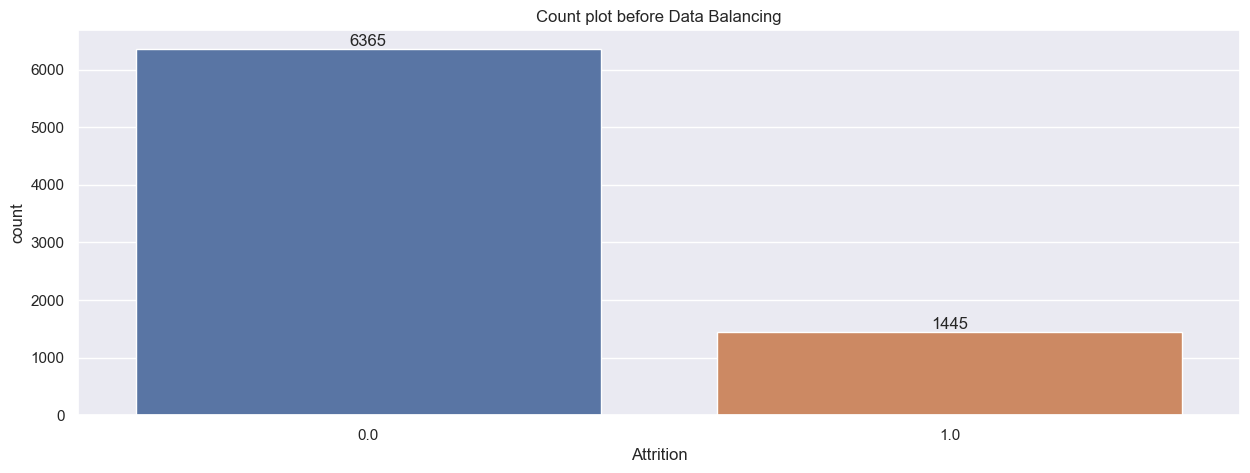

In [141]:
plt.figure(figsize = (15 , 5))
a = sns.countplot(x = 'Attrition' ,  data = df)

for i in a.containers:
    
    a.bar_label(i)
    
plt.title('Count plot before Data Balancing')
plt.show()

#### Pieplot

In [142]:
train['Attrition'].value_counts()

0.0    3735
1.0    1445
Name: Attrition, dtype: int64

In [143]:
label = train['Attrition'].value_counts().index

In [144]:
label

Float64Index([0.0, 1.0], dtype='float64')

In [145]:
value = train['Attrition'].value_counts().values

In [146]:
value

array([3735, 1445], dtype=int64)

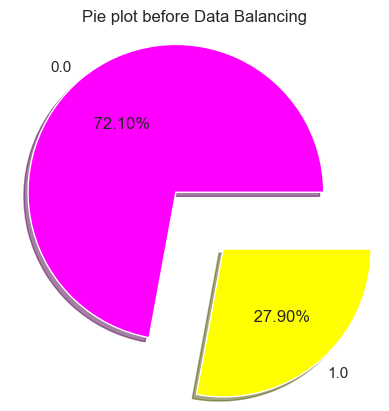

In [147]:
plt.pie(value,
    explode=(0.2 , 0.3),
    labels = label,
    colors=['magenta' , 'yellow'],
    autopct='% 1.2f%%',
    pctdistance=0.6,
    shadow=True,
    labeldistance=1.1)
plt.title('Pie plot before Data Balancing')
plt.show()

### Insights : Data is Imbalance
###  means no attrition has 72.10 %  data and attrition has  27.90% Data. Its pure Imbalance Data

### Make Data Balance

In [148]:
from imblearn.over_sampling import SMOTE

In [149]:
smote = SMOTE()

In [150]:
smote

SMOTE()

In [151]:
x_smote , y_smote = smote.fit_resample(x , y)

In [152]:
print('Data Before the resmaple x data :' , x.shape)
print('Data Before the resmaple y data :' , y.shape)
print()
print('****'*10)
print()
print('Data After the resmaple x data :' , x_smote.shape)
print('Data After the resmaple y data :' , y_smote.shape)

Data Before the resmaple x data : (5180, 20)
Data Before the resmaple y data : (5180,)

****************************************

Data After the resmaple x data : (7470, 20)
Data After the resmaple y data : (7470,)


In [153]:
pd.DataFrame(y_smote).value_counts()

Attrition
0.0          3735
1.0          3735
dtype: int64

#### Countplot after the Data Balancing

In [154]:
y_smote = pd.DataFrame(y_smote)

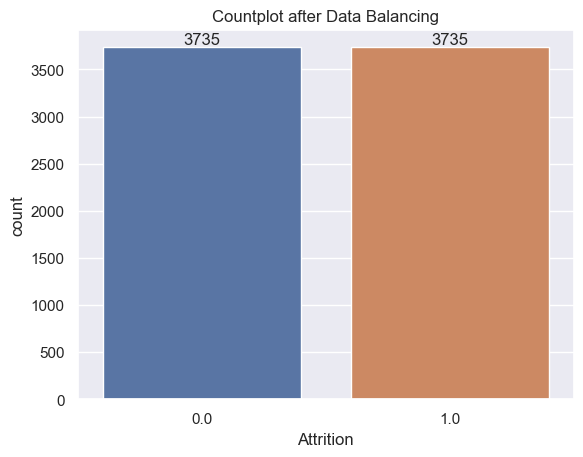

In [155]:
a = sns.countplot(data = y_smote ,x = 'Attrition' )

for i in a.containers:
    
    plt.bar_label(i)
    
    
plt.title('Countplot after Data Balancing')
plt.show()

#### Pietplot after the Data Balancing

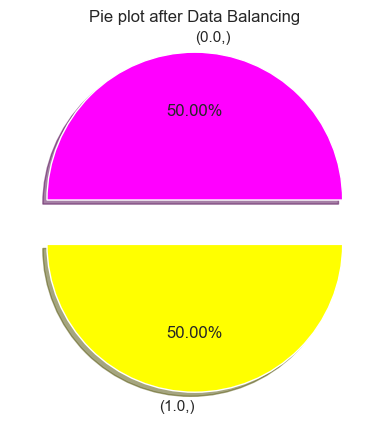

In [156]:
plt.pie(x = y_smote.value_counts().values,
    explode=(0.1,0.2),
    labels=y_smote.value_counts().index,
    colors=['magenta','yellow'],
    autopct='%1.2f%%',
    pctdistance=0.6,
    shadow=True)

plt.title('Pie plot after Data Balancing')
plt.show()

#### Insights : Data is Balance now

### Split the data into train and test

In [157]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.25 , random_state = 1 , stratify = y)

In [158]:
print(x_train.shape , x_test.shape , y_train.shape , y_test.shape)

(3885, 20) (1295, 20) (3885,) (1295,)


### split the scaled data in train and test

##### This scaled data for like KNN  , naivebayes , svm

In [159]:
x_train_s  =  scaler.fit_transform(x_train)
x_test_s   =  scaler.transform(x_test)

In [160]:
print(x_train_s.shape , x_test_s.shape , y_train.shape , y_test.shape )

(3885, 20) (1295, 20) (3885,) (1295,)


##### Check Chi Square test for significance variable for character data

In [161]:
for col in df[character_col].columns:
    
    contingency_table = pd.crosstab(df[col], df["Attrition"])
    
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    
    if p < 0.05:
        
        print('This is significant variable because its p value less than 0.05 :' , col)
        print(f"Chi-square test for {col} : p-value =", p)
        
        print()
        print('***'*20)
        print()
        

This is significant variable because its p value less than 0.05 : TravelProfile
Chi-square test for TravelProfile : p-value = 3.3746321600587096e-21

************************************************************

This is significant variable because its p value less than 0.05 : Department
Chi-square test for Department : p-value = 2.4059678622865646e-08

************************************************************

This is significant variable because its p value less than 0.05 : EducationField
Chi-square test for EducationField : p-value = 3.155879957212485e-17

************************************************************

This is significant variable because its p value less than 0.05 : Gender
Chi-square test for Gender : p-value = 0.0016386973683136942

************************************************************

This is significant variable because its p value less than 0.05 : Designation
Chi-square test for Designation : p-value = 1.1929559795883463e-70

**************************

In [162]:
print(character_col)

['TravelProfile', 'Department', 'EducationField', 'Gender', 'Designation', 'MaritalStatus']


##### ANNOVA Test for to check signficance variable for Numeric variables

In [163]:
for i in df[numeric_col].columns:
    
    IV = i 
    DV = "Attrition"  
    
    formula = f"{DV} ~ {IV}"
    
    model = ols(formula, data=df).fit()
    
    anova_table = sm.stats.anova_lm(model, typ=2)  
    
    #print(anova_table)
    
    print('*'*20)
    
    
    p_value = anova_table["PR(>F)"][0]
    
    significance_level = 0.05 
    
    if p_value < significance_level:
        
        print(i , " : The variable is significant." , p_value)
        
        print('*' * 25)

********************
EmployeeID  : The variable is significant. 5.163227220987769e-210
*************************
********************
Attrition  : The variable is significant. 0.0
*************************
********************
Age  : The variable is significant. 5.902509615683591e-37
*************************
********************
HomeToWork  : The variable is significant. 1.703025693337084e-07
*************************
********************
********************
Involvement  : The variable is significant. 1.3702913852567422e-21
*************************
********************
********************
JobSatisfaction  : The variable is significant. 4.800172791392023e-19
*************************
********************
********************
NumCompaniesWorked  : The variable is significant. 0.0027461855331409666
*************************
********************
OverTime  : The variable is significant. 1.5028145677097292e-77
*************************
********************
********************
WorkExperi

In [164]:
print(numeric_col)

['EmployeeID', 'Attrition', 'Age', 'HomeToWork', 'HourlnWeek', 'Involvement', 'WorkLifeBalance', 'JobSatisfaction', 'ESOPs', 'NumCompaniesWorked', 'OverTime', 'SalaryHikelastYear', 'WorkExperience', 'LastPromotion', 'CurrentProfile', 'MonthlyIncome']


# ***************************

# Just for check

In [165]:
contingency_table = pd.crosstab(df["EmployeeID"], df["Attrition"])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print("Chi-square test for PassengerId: p-value =", p)

Chi-square test for PassengerId: p-value = 0.494679881224822


# ********

In [166]:
df.head(2)

,EmployeeID,Attrition,Age,TravelProfile,Department,HomeToWork,EducationField,Gender,HourlnWeek,Involvement,...,ESOPs,NumCompaniesWorked,OverTime,SalaryHikelastYear,WorkExperience,LastPromotion,CurrentProfile,MaritalStatus,MonthlyIncome,Data
0,5110001.0,0.0,35.0,1,0,5.0,0,1,69.0,1.0,...,1.0,1.0,1.0,20.0,7.0,2.0,3.0,1,18932.0,Train
1,5110002.0,1.0,32.0,2,2,5.0,5,0,62.0,4.0,...,0.0,8.0,0.0,20.0,4.0,1.0,3.0,2,18785.0,Train


In [167]:
df['EmployeeID'].info()

<class 'pandas.core.series.Series'>
Int64Index: 7810 entries, 0 to 2629
Series name: EmployeeID
Non-Null Count  Dtype  
--------------  -----  
7810 non-null   float64
dtypes: float64(1)
memory usage: 122.0 KB


## We can build Machine Learning Model Now

#### First we check avg accuracy of various algorithms

In [168]:
estimator = [('Logistic' , LogisticRegression()) , ('RandomForest' , RandomForestClassifier()) , ('XGBOOST' , XGBClassifier()) , ('GradientBoost' , GradientBoostingClassifier()) , ('DecisionTree' , DecisionTreeClassifier()) , ('BaggingClassifier' , BaggingClassifier()) , ('Ada' , AdaBoostClassifier())]

In [169]:
print(estimator)

[('Logistic', LogisticRegression()), ('RandomForest', RandomForestClassifier()), ('XGBOOST', XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)), ('GradientBoost', GradientBoostingClassifier()), ('DecisionTree', DecisionTreeClassifier()), ('BaggingClassifier', BaggingClassifier()), ('Ada', Ad

In [170]:
for i in estimator:
    
    accuracy = cross_val_score(i[1] , x_train , y_train , cv = 10 , scoring = 'accuracy')
    
    #print(i[0] , ':' , np.round(np.mean(accuracy)))
    print(f'{i[0]} :  {accuracy.mean()}')

Logistic :  0.7459438687620914
RandomForest :  0.9740068375162325
XGBOOST :  0.9734867357485489
GradientBoost :  0.8692477407044231
DecisionTree :  0.9371935706145814
BaggingClassifier :  0.9559901147536639
Ada :  0.8154400657249623


In [171]:
estimators = [('KNN' , KNeighborsClassifier())  , ('Naive Bayes' , GaussianNB()) ,( 'SVM' , svm.SVC())]

In [172]:
print(estimators)

[('KNN', KNeighborsClassifier()), ('Naive Bayes', GaussianNB()), ('SVM', SVC())]


In [173]:
for i in estimators:
    
    model_accuracy = cross_val_score(i[1] , x_train_s , y_train , cv = 10 , scoring = 'accuracy')
    
    print(f'{i[0]} : {model_accuracy.mean()}')

KNN : 0.908110937375772
Naive Bayes : 0.7570117668884
SVM : 0.8797915617629132


### LogisticRegression

In [174]:
logit = LogisticRegression()

In [175]:
logit

LogisticRegression()

##### fit the model

In [176]:
logit.fit(x_train , y_train)

LogisticRegression()

##### Training and Testing Prediction

In [177]:
y_train_pred_lg = logit.predict(x_train)
y_test_pred_lg = logit.predict(x_test)

##### Training Accuracy of Logit

In [178]:
training_accuracy_lg = accuracy_score(y_train , y_train_pred_lg)

In [179]:
training_accuracy_lg

0.7374517374517374

##### Testing Accuracy of Logit

In [180]:
testing_accuracy_lg = accuracy_score(y_test , y_test_pred_lg)

In [181]:
testing_accuracy_lg

0.7382239382239382

##### Confusion matrix of logit

##### Train

In [182]:
confusion_matrix(y_train , y_train_pred_lg)

array([[2645,  156],
       [ 864,  220]], dtype=int64)

#### Insights : 
####           TN : 2665
####            TP : 280
####            FP : 790
####            FN : 150

In [183]:
print(classification_report(y_train , y_train_pred_lg))

              precision    recall  f1-score   support

         0.0       0.75      0.94      0.84      2801
         1.0       0.59      0.20      0.30      1084

    accuracy                           0.74      3885
   macro avg       0.67      0.57      0.57      3885
weighted avg       0.71      0.74      0.69      3885



#### Insights : micro accuracy because 0.61 so we cant accept because we need above 70 % micro accuracy

##### Test

In [184]:
confusion_matrix(y_test , y_test_pred_lg)

array([[890,  44],
       [295,  66]], dtype=int64)

##### Insights:
#### TN : 872
#### TP : 95
#### FP : 280
#### FN : 48

In [185]:
print(classification_report(y_test , y_test_pred_lg))

              precision    recall  f1-score   support

         0.0       0.75      0.95      0.84       934
         1.0       0.60      0.18      0.28       361

    accuracy                           0.74      1295
   macro avg       0.68      0.57      0.56      1295
weighted avg       0.71      0.74      0.68      1295



###### Insights : micro accuracy because 0.60 so we cant accept because we need above 70 % micro accuracy

In [186]:
print('Training Accuracy of logistic regression :' , training_accuracy_lg)
print('**'*20)
print('Testing Accuracy of logistic regression :' , testing_accuracy_lg)

Training Accuracy of logistic regression : 0.7374517374517374
****************************************
Testing Accuracy of logistic regression : 0.7382239382239382


### KNeighborsClassifier

In [187]:
error_rate = []
k_list  = []

for i in range(1 , 30):
    
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(x_train_s , y_train)
    y_train_pred_knn = knn.predict(x_train_s)
    #error_rate.append(np.mean(y_train != y_train_pred_knn))
    error_rate.append(np.mean(y_train != y_train_pred_knn))
    k_list.append(i)

In [188]:
print(len(y_train ))

print(len(y_train_pred_knn))

3885
3885


In [189]:
print(np.mean(y_train != y_train_pred_knn))

0.17966537966537965


In [190]:
print(error_rate)

[0.0, 0.009523809523809525, 0.01904761904761905, 0.022136422136422137, 0.030373230373230375, 0.04247104247104247, 0.05045045045045045, 0.06640926640926641, 0.07078507078507079, 0.09034749034749034, 0.08648648648648649, 0.11685971685971686, 0.11222651222651223, 0.13564993564993566, 0.1305019305019305, 0.14671814671814673, 0.1425997425997426, 0.15135135135135136, 0.14954954954954955, 0.15933075933075933, 0.15855855855855855, 0.1709137709137709, 0.16576576576576577, 0.17477477477477477, 0.17014157014157014, 0.17683397683397684, 0.1745173745173745, 0.18301158301158302, 0.17966537966537965]


In [191]:
print(k_list)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


#### Plot for to check value of k for training model

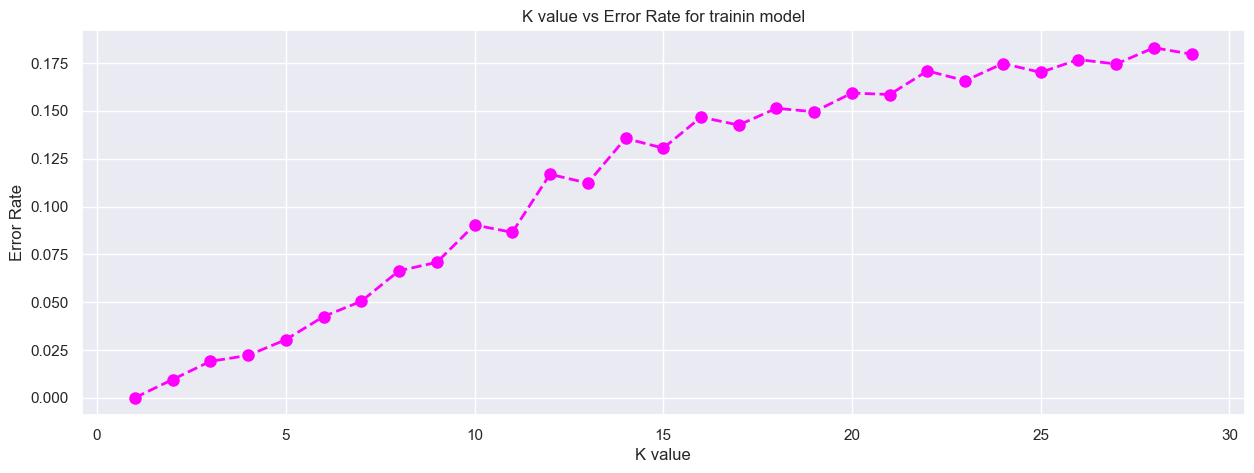

In [192]:
plt.figure(figsize = (15,5))
plt.plot(k_list, error_rate, color='magenta', marker='o', linestyle='dashed',linewidth=2, markersize=8)
plt.xlabel('K value')
plt.ylabel('Error Rate')
plt.title('K value vs Error Rate for trainin model')
plt.show()

##### K is 3 where we get less error (we have k = 1 where we get error is 0 but we are not taking 0 as error rate then we have another less error at k = 2 but we always select k value as odd )

#### Build Train model of knn

In [193]:
knn_train = KNeighborsClassifier(n_neighbors = 3)
knn_train.fit(x_train_s , y_train)
y_train_pred_knn = knn_train.predict(x_train_s)
#y_test_pred_knn = knn_train.predict(x_test_s)
training_accuracy_knn = accuracy_score(y_train , y_train_pred_knn)
#testing_accuracy_knn  = accuracy_score(y_test , y_test_pred_knn)
print('Training Accuracy of knn train model :' , training_accuracy_knn)
#print('Testing Accuracy of knn test model :' , testing_accuracy_knn)

Training Accuracy of knn train model : 0.9809523809523809


#### Confusion matrix of train model of knn

In [194]:
confusion_matrix(y_train , y_train_pred_knn)

array([[2742,   59],
       [  15, 1069]], dtype=int64)

#### Insights : 

#### TN : 2771
#### TP : 1055
#### FP : 15
#### FN : 44

In [195]:
print(classification_report(y_train , y_train_pred_knn))

              precision    recall  f1-score   support

         0.0       0.99      0.98      0.99      2801
         1.0       0.95      0.99      0.97      1084

    accuracy                           0.98      3885
   macro avg       0.97      0.98      0.98      3885
weighted avg       0.98      0.98      0.98      3885



#### Insights : we get very best micro avg is 98 %

### Test model of knn 

In [196]:
# x_train_scaled  =  scaler.fit_transform(x_train)
# x_test_scaled   =  scaler.transform(x_test)

In [197]:
# error_rate_test = []
# k_list_test = []
# for i in range(1 , 30):
    
#     knn = KNeighborsClassifier(n_neighbors = i)
#     knn.fit(x_train_s , y_train)
#     y_test_pred_knn = knn.predict(x_test_s)
#     error_rate_test.append(np.mean(y_test != y_test_pred_knn))
#     k_list_test.append(i)
    
    
    
error_rate_test = []
k_list_test = []

for i in range(1,30):
    
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(x_train_s , y_train)
    y_test_pred_knn = knn.predict(x_test_s)
    error_rate_test.append(np.mean(y_test != y_test_pred_knn))
    k_list_test.append(i)

In [198]:
print(error_rate_test)

[0.03474903474903475, 0.040154440154440155, 0.054826254826254826, 0.05868725868725869, 0.06795366795366796, 0.07876447876447877, 0.08725868725868725, 0.10579150579150579, 0.11351351351351352, 0.12895752895752896, 0.12046332046332046, 0.14594594594594595, 0.14208494208494207, 0.15752895752895754, 0.15444015444015444, 0.15675675675675677, 0.15135135135135136, 0.16293436293436295, 0.16293436293436295, 0.16833976833976835, 0.16447876447876447, 0.16988416988416988, 0.16293436293436295, 0.17606177606177606, 0.17374517374517376, 0.17606177606177606, 0.17142857142857143, 0.18455598455598454, 0.1783783783783784]


In [199]:
print(k_list_test)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


#### Plot k values of test model

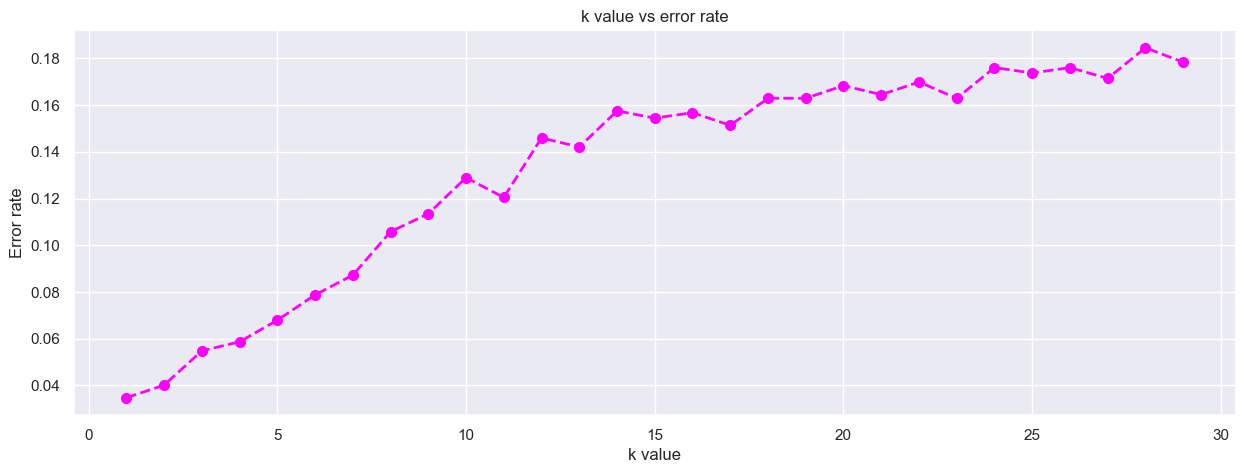

In [200]:
plt.figure(figsize = (15 , 5))
plt.plot(k_list_test , error_rate_test ,  color='magenta', marker='o', linestyle='dashed',linewidth=2, markersize=7)
plt.xlabel('k value')
plt.ylabel('Error rate')
plt.title('k value vs error rate')
plt.show()

### k = 3

### Build test model

In [201]:
knn_test = KNeighborsClassifier(n_neighbors = 3)
knn_test.fit(x_train_s , y_train)
y_test_pred_knn = knn_test.predict(x_test_s)
testing_accuracy_knn = accuracy_score(y_test , y_test_pred_knn)

print('Testing Accuracy of knn model is :' , testing_accuracy_knn)


Testing Accuracy of knn model is : 0.9451737451737452


In [202]:
confusion_matrix(y_test , y_test_pred_knn)

array([[879,  55],
       [ 16, 345]], dtype=int64)

###### Insights :

##### 1.TN : 869
##### 2.TP : 348
##### 3.FP : 27
##### 4.FN : 51

In [203]:
print(classification_report(y_test , y_test_pred_knn))

              precision    recall  f1-score   support

         0.0       0.98      0.94      0.96       934
         1.0       0.86      0.96      0.91       361

    accuracy                           0.95      1295
   macro avg       0.92      0.95      0.93      1295
weighted avg       0.95      0.95      0.95      1295



##### Insights : we get very best micro avg is 94 %

In [204]:
print("Training Accuracy of knn is : " , training_accuracy_knn)
print('***'*20)
print('Testing Accuracy of knn is :' , testing_accuracy_knn)

Training Accuracy of knn is :  0.9809523809523809
************************************************************
Testing Accuracy of knn is : 0.9451737451737452


### RandomForest Classifier

In [205]:
rf = RandomForestClassifier(n_estimators=1000,criterion = 'gini')

In [206]:
rf

RandomForestClassifier(n_estimators=1000)

#### Fit the model

In [207]:
rf.fit(x_train , y_train)

RandomForestClassifier(n_estimators=1000)

In [208]:
rf

RandomForestClassifier(n_estimators=1000)

###### Training and testing prediction

In [209]:
y_train_pred_rf = rf.predict(x_train)
y_test_pred_rf = rf.predict(x_test)

##### Training Accuracy of randomForest

In [210]:
accuracy_score(y_train , y_train_pred_rf)

1.0

#### K Fold cross val on RandomForest

In [211]:
score = cross_val_score(rf , x_train , y_train , cv = 10)

In [212]:
score

array([0.97172237, 0.98200514, 0.97943445, 0.96915167, 0.95372751,
       0.97680412, 0.98195876, 0.98453608, 0.97680412, 0.9871134 ])

In [213]:
training_accuracy_rf = score.mean()

In [214]:
training_accuracy_rf

0.9763257625950758

#### Testing Accuracy of RandomForest

In [215]:
testing_accuracy_rf = accuracy_score(y_test , y_test_pred_rf)

In [216]:
testing_accuracy_rf

0.9907335907335907

In [217]:
print(confusion_matrix(y_test , y_test_pred_rf))

[[928   6]
 [  6 355]]


##### Insights :

##### TN : 911
##### TP : 356
##### FP : 19
##### FN : 9

In [218]:
print(classification_report(y_test , y_test_pred_rf))

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99       934
         1.0       0.98      0.98      0.98       361

    accuracy                           0.99      1295
   macro avg       0.99      0.99      0.99      1295
weighted avg       0.99      0.99      0.99      1295



In [219]:
print('updated training accuracy of RandomForest :' , training_accuracy_rf)
print('testing accuracy of randomforest :' , testing_accuracy_rf)

updated training accuracy of RandomForest : 0.9763257625950758
testing accuracy of randomforest : 0.9907335907335907


### AUC ROC Curve by RandomForest

In [220]:
roc_auc_score_rf = roc_auc_score(y_test , y_test_pred_rf)

In [221]:
roc_auc_score_rf

0.9884777592578313

### Draw roc curve

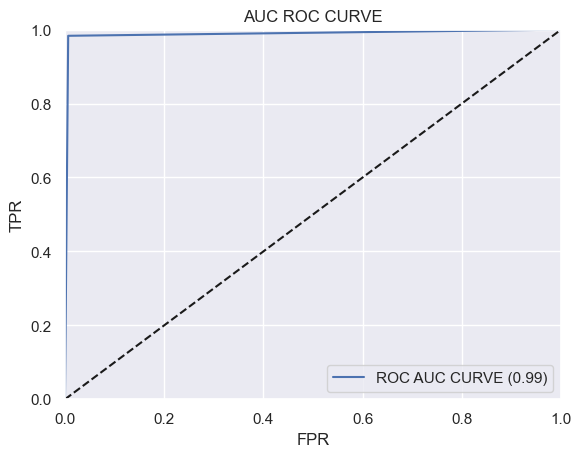

In [222]:
fpr , tpr , threshold = roc_curve(y_test , y_test_pred_rf)

#ROC CURVE
plt.plot(fpr , tpr , label = 'ROC AUC CURVE (%1.2f)'%roc_auc_score_rf)

#AUC CURVE
plt.plot([0,1] , [0,1] , 'k--')
plt.xlim([0.0  , 1.0])
plt.ylim([0.0 , 1.0])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('AUC ROC CURVE')
plt.legend(loc = 'lower right')
plt.show()

### GradientBoostClassifier

In [223]:
gb = GradientBoostingClassifier(loss='log_loss',learning_rate=0.5,n_estimators=100)

In [224]:
gb

GradientBoostingClassifier(learning_rate=0.5)

#### Fit the gb model

In [225]:
gb.fit(x_train , y_train)

GradientBoostingClassifier(learning_rate=0.5)

##### Training and testing prediction

In [226]:
y_train_pred_gb = gb.predict(x_train)
y_test_pred_gb = gb.predict(x_test)

#### Training  Accuracy of GB

In [227]:
training_accuracy_gb = accuracy_score(y_train , y_train_pred_gb)

In [228]:
training_accuracy_gb

0.9822393822393822

##### test model of gb

In [229]:
testing_accuracy_gb = accuracy_score(y_test , y_test_pred_gb)

In [230]:
testing_accuracy_gb

0.9528957528957529

In [231]:
confusion_matrix(y_test , y_test_pred_gb)

array([[903,  31],
       [ 30, 331]], dtype=int64)

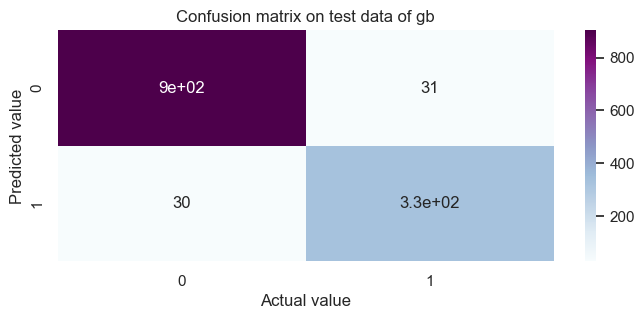

In [232]:
plt.figure(figsize = (8 , 3))
sns.heatmap(confusion_matrix(y_test , y_test_pred_gb) , cmap ='BuPu' , annot = True , cbar = True)
plt.xlabel('Actual value')
plt.ylabel('Predicted value')
plt.title('Confusion matrix on test data of gb')
plt.show()

##### Insights :
#### TN : 892
#### TP : 333
#### FP : 42
#### FN : 28

In [233]:
print(classification_report(y_test , y_test_pred_gb))

              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97       934
         1.0       0.91      0.92      0.92       361

    accuracy                           0.95      1295
   macro avg       0.94      0.94      0.94      1295
weighted avg       0.95      0.95      0.95      1295



##### Insights : we get 93 % micro accuracy

##### AUC ROC Curve by GB

In [234]:
from sklearn.metrics import roc_auc_score

In [235]:
roc_auc_score_gb = roc_auc_score(y_test , y_test_pred_gb)

In [236]:
roc_auc_score_gb

0.9418534643833747

#### Draw roc curve

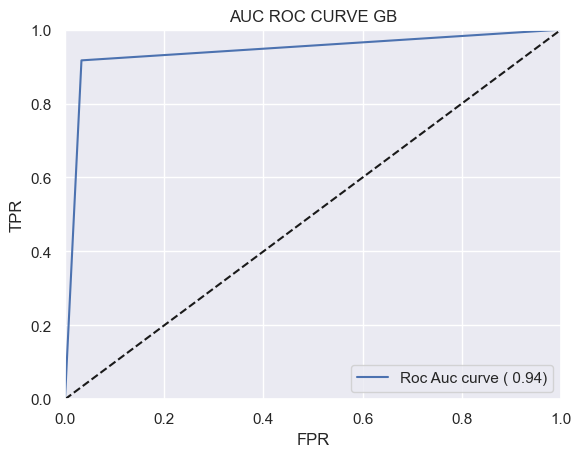

In [237]:
fpr , tpr , threshold = roc_curve(y_test , y_test_pred_gb)

plt.plot(fpr , tpr , label = 'Roc Auc curve (% 1.2f)'%roc_auc_score_gb)

plt.plot([0,1] , [0,1] , 'k--')
plt.xlim([0.0 , 1.0])
plt.ylim([0.0 , 1.0])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('AUC ROC CURVE GB')
plt.legend(loc = 'lower right')
plt.show()

In [238]:
print('Updated training Accuracy of gradientboost :' , training_accuracy_gb)
print('Testing Accuracy of gradientboost :' , testing_accuracy_gb)

Updated training Accuracy of gradientboost : 0.9822393822393822
Testing Accuracy of gradientboost : 0.9528957528957529


### XGBOOST

In [239]:
xgb = XGBClassifier()

In [240]:
xgb

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [241]:
xgb.fit(x_train , y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

#### Train and test prediction

In [242]:
y_train_pred_xgb = xgb.predict(x_train)
y_test_pred_xgb = xgb.predict(x_test)

##### Training Accuracy of xgb

In [243]:
accuracy_score(y_train , y_train_pred_xgb)

1.0

##### K Fold cross val on xgb

In [244]:
accuracy_xgb = cross_val_score(xgb , x_train  , y_train , cv = 10)

In [245]:
accuracy_xgb

array([0.97686375, 0.97943445, 0.96915167, 0.97943445, 0.96658098,
       0.97680412, 0.96649485, 0.96907216, 0.97938144, 0.97164948])

In [246]:
training_accuracy_xgb = accuracy_xgb.mean()

In [247]:
training_accuracy_xgb

0.9734867357485489

##### Test model of xgb

In [248]:
testing_accuracy_xgb = accuracy_score(y_test , y_test_pred_xgb)

In [249]:
testing_accuracy_xgb

0.9845559845559846

In [250]:
confusion_matrix(y_test , y_test_pred_xgb)

array([[922,  12],
       [  8, 353]], dtype=int64)

### insights :
#### 1.TN : 911
#### 2.TP : 357
#### 3.FP : 18
#### 4.FN : 9

In [251]:
print(classification_report(y_test , y_test_pred_gb))

              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97       934
         1.0       0.91      0.92      0.92       361

    accuracy                           0.95      1295
   macro avg       0.94      0.94      0.94      1295
weighted avg       0.95      0.95      0.95      1295



##### Insights : we get 93% micro accuracy

### AUC ROC curve by  xgb

In [252]:
roc_auc_score_xgb = roc_auc_score(y_test , y_test_pred_xgb)

In [253]:
roc_auc_score_xgb

0.9824956847206487

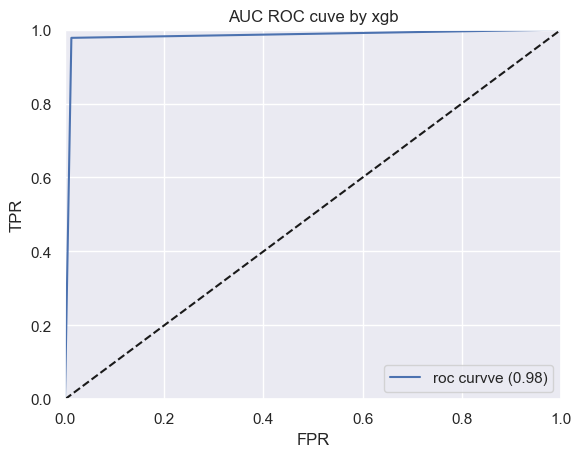

In [254]:
fpr , tpr , threshold = roc_curve(y_test , y_test_pred_xgb)

plt.plot(fpr , tpr , label = 'roc curvve (%1.2f)'%roc_auc_score_xgb)
plt.plot([0,1] , [0,1] , 'k--')
plt.xlim([0.0 , 1.0])
plt.ylim([0.0  , 1.0])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('AUC ROC cuve by xgb')
plt.legend(loc = 'lower right')
plt.show()

### AdaBoostClassifier

In [255]:
ada = AdaBoostClassifier(n_estimators=50)

In [256]:
ada.fit(x_train , y_train)

AdaBoostClassifier()

In [257]:
y_train_pred_ada = ada.predict(x_train)
y_test_pred_ada = ada.predict(x_test)

#### Training Accuracy of ada

In [258]:
training_accuracy_ada = accuracy_score(y_train , y_train_pred_ada)

In [259]:
training_accuracy_ada

0.824967824967825

In [260]:
confusion_matrix(y_train , y_train_pred_ada)

array([[2605,  196],
       [ 484,  600]], dtype=int64)

In [261]:
print(classification_report(y_train , y_train_pred_ada))

              precision    recall  f1-score   support

         0.0       0.84      0.93      0.88      2801
         1.0       0.75      0.55      0.64      1084

    accuracy                           0.82      3885
   macro avg       0.80      0.74      0.76      3885
weighted avg       0.82      0.82      0.82      3885



In [262]:
roc_auc_score_ada = roc_auc_score(y_train , y_train_pred_ada)

In [263]:
roc_auc_score_ada

0.7417652630649834

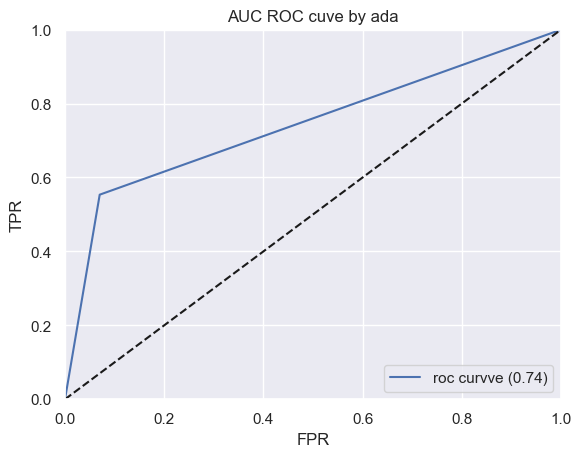

In [264]:
roc_auc_score_ada = roc_auc_score(y_train , y_train_pred_ada)

fpr , tpr , threshold = roc_curve(y_train , y_train_pred_ada)

plt.plot(fpr , tpr , label = 'roc curvve (%1.2f)'%roc_auc_score_ada)
plt.plot([0,1] , [0,1] , 'k--')
plt.xlim([0.0 , 1.0])
plt.ylim([0.0  , 1.0])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('AUC ROC cuve by ada')
plt.legend(loc = 'lower right')
plt.show()

#### Testing Accuracy of ada

In [265]:
testing_accuracy_ada = accuracy_score(y_test , y_test_pred_ada)

In [266]:
testing_accuracy_ada

0.8401544401544402

In [267]:
confusion_matrix(y_test , y_test_pred_ada)

array([[869,  65],
       [142, 219]], dtype=int64)

In [268]:
print(classification_report(y_test , y_test_pred_ada))

              precision    recall  f1-score   support

         0.0       0.86      0.93      0.89       934
         1.0       0.77      0.61      0.68       361

    accuracy                           0.84      1295
   macro avg       0.82      0.77      0.79      1295
weighted avg       0.83      0.84      0.83      1295



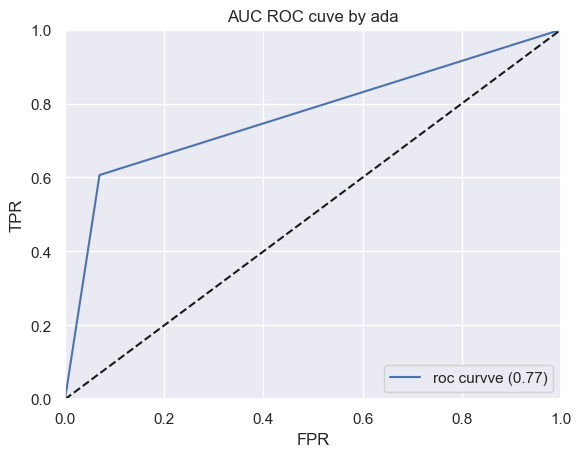

In [269]:
roc_auc_score_ada = roc_auc_score(y_test , y_test_pred_ada)

fpr , tpr , threshold = roc_curve(y_test , y_test_pred_ada)

plt.plot(fpr , tpr , label = 'roc curvve (%1.2f)'%roc_auc_score_ada)
plt.plot([0,1] , [0,1] , 'k--')
plt.xlim([0.0 , 1.0])
plt.ylim([0.0  , 1.0])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('AUC ROC cuve by ada')
plt.legend(loc = 'lower right')
plt.show()

### BaggingClassifier

In [270]:
bg = BaggingClassifier()

In [271]:
bg

BaggingClassifier()

In [272]:
bg.fit(x_train , y_train)

BaggingClassifier()

In [273]:
y_train_pred_bg = bg.predict(x_train)
y_test_pred_bg =  bg.predict(x_test)

##### Training Accuracy of bg

In [274]:
training_accuracy_bg = accuracy_score(y_train , y_train_pred_bg)

In [275]:
training_accuracy_bg

0.9974259974259975

In [276]:
confusion_matrix(y_train , y_train_pred_bg)

array([[2798,    3],
       [   7, 1077]], dtype=int64)

In [277]:
print(classification_report(y_train , y_train_pred_bg))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2801
         1.0       1.00      0.99      1.00      1084

    accuracy                           1.00      3885
   macro avg       1.00      1.00      1.00      3885
weighted avg       1.00      1.00      1.00      3885



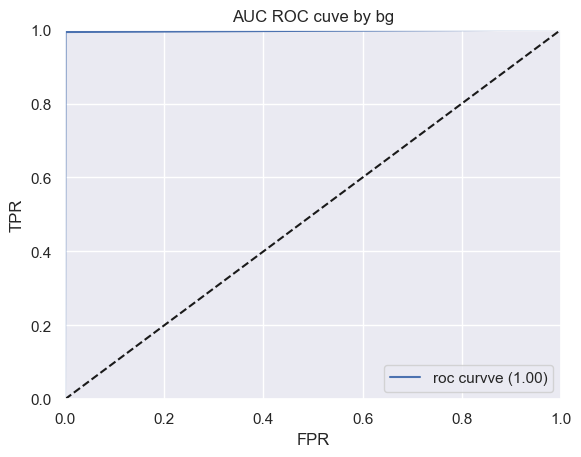

In [278]:
roc_auc_score_bg = roc_auc_score(y_train , y_train_pred_bg)

fpr , tpr , threshold = roc_curve(y_train , y_train_pred_bg)

plt.plot(fpr , tpr , label = 'roc curvve (%1.2f)'%roc_auc_score_bg)
plt.plot([0,1] , [0,1] , 'k--')
plt.xlim([0.0 , 1.0])
plt.ylim([0.0  , 1.0])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('AUC ROC cuve by bg')
plt.legend(loc = 'lower right')
plt.show()

#### Test model

In [279]:
testing_accuracy_bg = accuracy_score(y_test , y_test_pred_bg)

In [280]:
testing_accuracy_bg

0.9737451737451738

In [281]:
confusion_matrix(y_test , y_test_pred_bg)

array([[919,  15],
       [ 19, 342]], dtype=int64)

In [282]:
print(classification_report(y_test , y_test_pred_bg))

              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98       934
         1.0       0.96      0.95      0.95       361

    accuracy                           0.97      1295
   macro avg       0.97      0.97      0.97      1295
weighted avg       0.97      0.97      0.97      1295



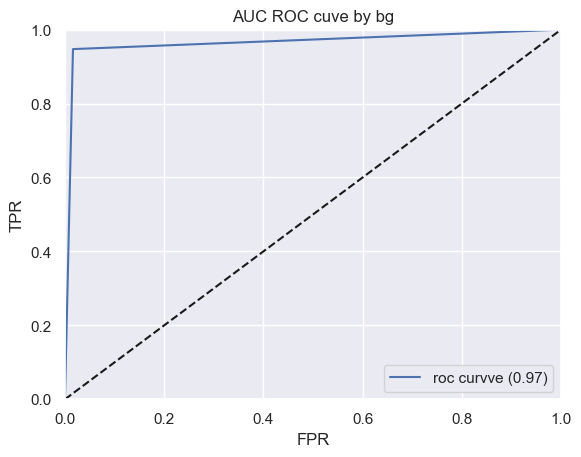

In [283]:
roc_auc_score_bg = roc_auc_score(y_test , y_test_pred_bg)

fpr , tpr , threshold = roc_curve(y_test , y_test_pred_bg)

plt.plot(fpr , tpr , label = 'roc curvve (%1.2f)'%roc_auc_score_bg)
plt.plot([0,1] , [0,1] , 'k--')
plt.xlim([0.0 , 1.0])
plt.ylim([0.0  , 1.0])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('AUC ROC cuve by bg')
plt.legend(loc = 'lower right')
plt.show()

In [284]:
print('Training Accuracy of bagging :' , training_accuracy_bg)
print('Testing Accuracy of bagging :' , testing_accuracy_bg)

Training Accuracy of bagging : 0.9974259974259975
Testing Accuracy of bagging : 0.9737451737451738


#### Prediction on test data

In [285]:
test.shape

(2630, 20)

In [286]:
test.head(2)

,Age,TravelProfile,Department,HomeToWork,EducationField,Gender,HourlnWeek,Involvement,WorkLifeBalance,Designation,JobSatisfaction,ESOPs,NumCompaniesWorked,OverTime,SalaryHikelastYear,WorkExperience,LastPromotion,CurrentProfile,MaritalStatus,MonthlyIncome
0,18.0,0,0,9.0,0,1,80.0,3.0,2.0,1,3.0,1.0,1.0,0.0,17.0,0.0,0.0,0.0,2,16904.0
1,20.0,1,0,28.0,5,0,59.0,1.0,3.0,1,1.0,1.0,2.0,1.0,18.0,2.0,1.0,3.0,2,18994.0


In [287]:
EmployeeID = df.loc[df['Data'] == 'Test' , 'EmployeeID']

In [288]:
EmployeeID  = pd.DataFrame(EmployeeID)

In [289]:
EmployeeID.head(2)

,EmployeeID
0,6110001.0
1,6110002.0


In [290]:
EmployeeID.shape

(2630, 1)

In [291]:
Attrition_test = bg.predict(test)

In [292]:
print(Attrition_test)

[1. 0. 0. ... 0. 1. 0.]


In [293]:
Attrition_test = pd.DataFrame(Attrition_test , columns = ['Attrition_Test'])

In [294]:
Attrition_test.head(2)

,Attrition_Test
0,1.0
1,0.0


In [295]:
EmployeeID.head(2)

,EmployeeID
0,6110001.0
1,6110002.0


In [296]:
df_submission = pd.concat([EmployeeID , Attrition_test] , axis = 1)

In [297]:
df_submission.head(2)

,EmployeeID,Attrition_Test
0,6110001.0,1.0
1,6110002.0,0.0


In [298]:
df_submission.to_csv('C:\\Users\\Lenovo\\Desktop\\capstone_submission.csv' , index = False)

In [299]:
df_submission.shape

(2630, 2)

In [300]:
test.shape

(2630, 20)

# I Consider BaggingClassifier algorithm and I made this decision after evaluation of all models

### DecisionTreeClassifier

#### In decisionTree classifier has two approaches like ginni and entropy.Here we will go with entropy only because entropy is benificial when dpendent variable in numeric only like here (1,0).but in real time we will check both then we will decide it 

In [301]:
dt = DecisionTreeClassifier(criterion='gini')

In [302]:
dt.fit(x_train , y_train)

DecisionTreeClassifier()

##### Train model

In [303]:
y_train_pred_dt = dt.predict(x_train)
training_accuracy_dt = accuracy_score(y_train,y_train_pred_dt)
print('Training Accuracy of decisionTree is :' , training_accuracy_dt)
print('**'*20)
print(confusion_matrix(y_train , y_train_pred_dt))
print('**'*20)
print(classification_report(y_train , y_train_pred_dt))

Training Accuracy of decisionTree is : 1.0
****************************************
[[2801    0]
 [   0 1084]]
****************************************
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2801
         1.0       1.00      1.00      1.00      1084

    accuracy                           1.00      3885
   macro avg       1.00      1.00      1.00      3885
weighted avg       1.00      1.00      1.00      3885



### K fold Cross val for dt

In [304]:
score = cross_val_score(dt , x_train , y_train , cv = 10)

In [305]:
score

array([0.93573265, 0.94858612, 0.92802057, 0.94601542, 0.9125964 ,
       0.93298969, 0.91752577, 0.93556701, 0.94329897, 0.96134021])

In [306]:
updated_training_accurcay_dt = score.mean()

In [307]:
updated_training_accurcay_dt

0.9361672806296875

### Test model of dt

In [308]:
y_test_pred_dt = dt.predict(x_test)
testing_accuracy_dt = accuracy_score(y_test,y_test_pred_dt)
print('Testing Accuracy of decisionTree is :' , testing_accuracy_dt)
print('**'*20)
print(confusion_matrix(y_test , y_test_pred_dt))
print('**'*20)
print(classification_report(y_test , y_test_pred_dt))

Testing Accuracy of decisionTree is : 0.9536679536679536
****************************************
[[892  42]
 [ 18 343]]
****************************************
              precision    recall  f1-score   support

         0.0       0.98      0.96      0.97       934
         1.0       0.89      0.95      0.92       361

    accuracy                           0.95      1295
   macro avg       0.94      0.95      0.94      1295
weighted avg       0.96      0.95      0.95      1295



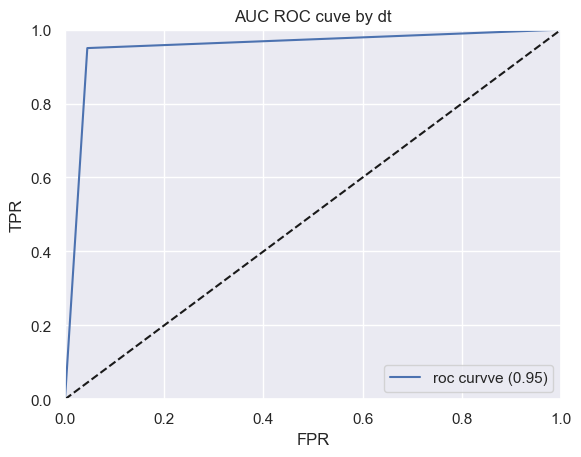

In [309]:
roc_auc_score_dt = roc_auc_score(y_test , y_test_pred_dt)

fpr , tpr , threshold = roc_curve(y_test , y_test_pred_dt)

plt.plot(fpr , tpr , label = 'roc curvve (%1.2f)'%roc_auc_score_dt)
plt.plot([0,1] , [0,1] , 'k--')
plt.xlim([0.0 , 1.0])
plt.ylim([0.0  , 1.0])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('AUC ROC cuve by dt')
plt.legend(loc = 'lower right')
plt.show()

In [310]:
print('Training Accuracy of DecisionTree is : ' , updated_training_accurcay_dt)
print('Testing Accuracy of DecisionTree is :' , testing_accuracy_dt)

Training Accuracy of DecisionTree is :  0.9361672806296875
Testing Accuracy of DecisionTree is : 0.9536679536679536


## SVM

In [311]:
svm = svm.SVC(C=1.0,kernel='rbf')

In [312]:
svm

SVC()

In [313]:
svm.fit(x_train_s ,  y_train)

SVC()

#### Training model

In [314]:
y_train_pred_svm = svm.predict(x_train_s)
training_accuracy_svm = accuracy_score(y_train , y_train_pred_svm)
print('Training Accuracy svm :' , training_accuracy_svm)
print('**'*20)
print(confusion_matrix(y_train , y_train_pred_svm))
print('**'*20)
print(classification_report(y_train , y_train_pred_svm))

Training Accuracy svm : 0.9184041184041184
****************************************
[[2741   60]
 [ 257  827]]
****************************************
              precision    recall  f1-score   support

         0.0       0.91      0.98      0.95      2801
         1.0       0.93      0.76      0.84      1084

    accuracy                           0.92      3885
   macro avg       0.92      0.87      0.89      3885
weighted avg       0.92      0.92      0.92      3885



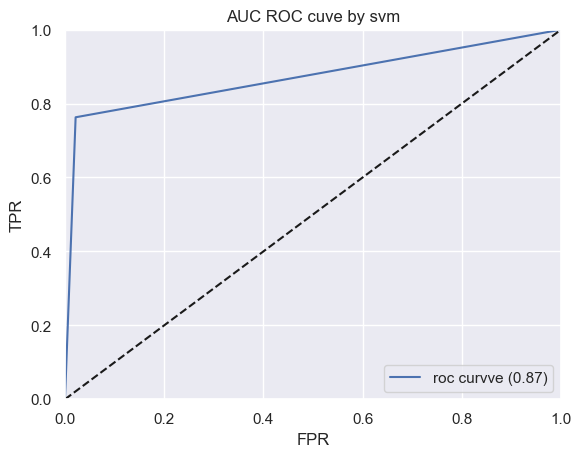

In [315]:
roc_auc_score_svm = roc_auc_score(y_train , y_train_pred_svm)

fpr , tpr , threshold = roc_curve(y_train , y_train_pred_svm)

plt.plot(fpr , tpr , label = 'roc curvve (%1.2f)'%roc_auc_score_svm)
plt.plot([0,1] , [0,1] , 'k--')
plt.xlim([0.0 , 1.0])
plt.ylim([0.0  , 1.0])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('AUC ROC cuve by svm')
plt.legend(loc = 'lower right')
plt.show()

#### Test model

In [316]:
y_test_pred_svm = svm.predict(x_test_s)
testing_accuracy_svm = accuracy_score(y_test , y_test_pred_svm)
print('Testing Accuracy svm :' , testing_accuracy_svm)
print('**'*20)
print(confusion_matrix(y_test , y_test_pred_svm))
print('**'*20)
print(classification_report(y_test , y_test_pred_svm))

Testing Accuracy svm : 0.905019305019305
****************************************
[[902  32]
 [ 91 270]]
****************************************
              precision    recall  f1-score   support

         0.0       0.91      0.97      0.94       934
         1.0       0.89      0.75      0.81       361

    accuracy                           0.91      1295
   macro avg       0.90      0.86      0.88      1295
weighted avg       0.90      0.91      0.90      1295



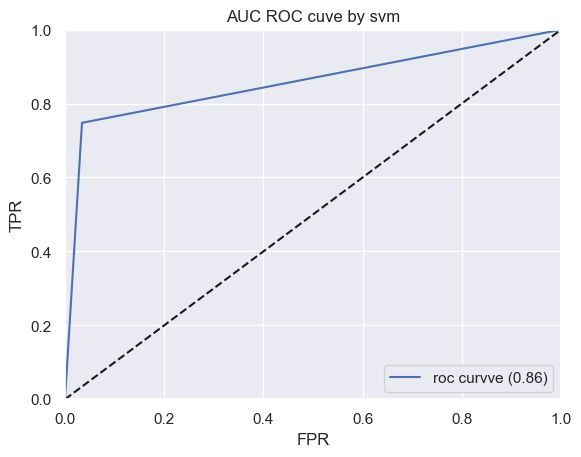

In [317]:
roc_auc_score_svm = roc_auc_score(y_test , y_test_pred_svm)

fpr , tpr , threshold = roc_curve(y_test , y_test_pred_svm)

plt.plot(fpr , tpr , label = 'roc curvve (%1.2f)'%roc_auc_score_svm)
plt.plot([0,1] , [0,1] , 'k--')
plt.xlim([0.0 , 1.0])
plt.ylim([0.0  , 1.0])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('AUC ROC cuve by svm')
plt.legend(loc = 'lower right')
plt.show()

In [318]:
print('Training Accuracy of svm is :' , training_accuracy_svm)
print('Testing Accuracy of svm is :' , testing_accuracy_svm)

Training Accuracy of svm is : 0.9184041184041184
Testing Accuracy of svm is : 0.905019305019305


### Naive Bayes

In [319]:
gn = GaussianNB()

In [320]:
gn

GaussianNB()

In [321]:
gn.fit(x_train_s , y_train)

GaussianNB()

#### Train model

In [322]:
y_train_pred_gn = gn.predict(x_train_s)
training_accuracy_gn = accuracy_score(y_train , y_train_pred_gn)
print('Training Accuracy of gn is :' , training_accuracy_gn)
print('**'*20)
print(confusion_matrix(y_train , y_train_pred_gn))
print('**'*20)
print(classification_report(y_train , y_train_pred_gn))

Training Accuracy of gn is : 0.7642213642213642
****************************************
[[2243  558]
 [ 358  726]]
****************************************
              precision    recall  f1-score   support

         0.0       0.86      0.80      0.83      2801
         1.0       0.57      0.67      0.61      1084

    accuracy                           0.76      3885
   macro avg       0.71      0.74      0.72      3885
weighted avg       0.78      0.76      0.77      3885



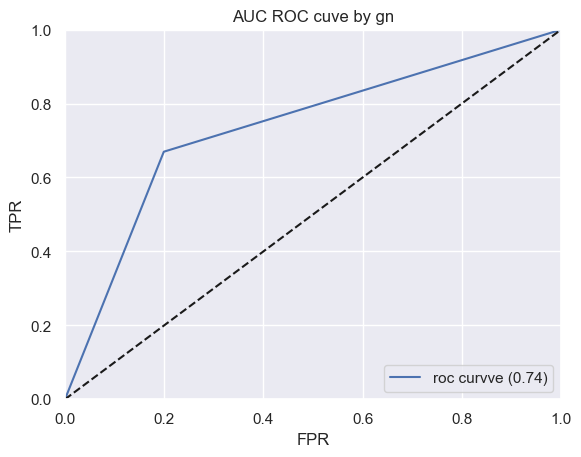

In [323]:
roc_auc_score_gn = roc_auc_score(y_train , y_train_pred_gn)

fpr , tpr , threshold = roc_curve(y_train , y_train_pred_gn)

plt.plot(fpr , tpr , label = 'roc curvve (%1.2f)'%roc_auc_score_gn)
plt.plot([0,1] , [0,1] , 'k--')
plt.xlim([0.0 , 1.0])
plt.ylim([0.0  , 1.0])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('AUC ROC cuve by gn')
plt.legend(loc = 'lower right')
plt.show()

#### Test model

In [324]:
y_test_pred_gn = gn.predict(x_test_s)
testing_accuracy_gn = accuracy_score(y_test , y_test_pred_gn)
print('Testing Accuracy of gn is :' , testing_accuracy_gn)
print('**'*20)
print(confusion_matrix(y_test , y_test_pred_gn))
print('**'*20)
print(classification_report(y_test , y_test_pred_gn))

Testing Accuracy of gn is : 0.7706563706563706
****************************************
[[744 190]
 [107 254]]
****************************************
              precision    recall  f1-score   support

         0.0       0.87      0.80      0.83       934
         1.0       0.57      0.70      0.63       361

    accuracy                           0.77      1295
   macro avg       0.72      0.75      0.73      1295
weighted avg       0.79      0.77      0.78      1295



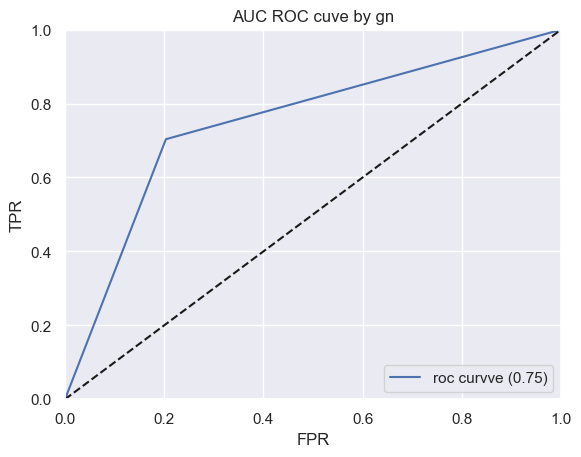

In [325]:
roc_auc_score_gn = roc_auc_score(y_test , y_test_pred_gn)

fpr , tpr , threshold = roc_curve(y_test , y_test_pred_gn)

plt.plot(fpr , tpr , label = 'roc curvve (%1.2f)'%roc_auc_score_gn)
plt.plot([0,1] , [0,1] , 'k--')
plt.xlim([0.0 , 1.0])
plt.ylim([0.0  , 1.0])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('AUC ROC cuve by gn')
plt.legend(loc = 'lower right')
plt.show()

In [326]:
print('Training Accuracy of gaussian is :' , training_accuracy_gn)
print('Testing Accuracy of gaussian is :' , testing_accuracy_gn)

Training Accuracy of gaussian is : 0.7642213642213642
Testing Accuracy of gaussian is : 0.7706563706563706
